## Module 1 Assignment Questions
1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.
2. Investigate missing data and outliers.
3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.
5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#!conda install --yes xgboost
import xgboost

%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

#stats model
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#!conda install --yes lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

# Model Accuracy
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_poisson_deviance, mean_squared_error 

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Upload and Read Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train_dup = df_train.copy()
df_test_dup = df_test.copy()

In [4]:
df_train_dup.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df_train_dup.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [6]:
df_train_dup.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
df_train_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
print(df_train_dup.shape)
print(df_test_dup.shape)

(1460, 81)
(1459, 80)


In [9]:
#print numeric columns and counts
num_cols = df_train_dup._get_numeric_data().columns 
display(num_cols)
len(num_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

38

Part of Data Prep

In [10]:
# Drop ID Column
print(df_train_dup.shape)
print(df_test_dup.shape)
df_train_dup = df_train.drop(labels = 'Id',axis=1)
df_test_dup = df_test.drop(labels = 'Id',axis=1)
print(df_train_dup.shape)
print(df_test_dup.shape)

(1460, 81)
(1459, 80)
(1460, 80)
(1459, 79)


Look at Distribution

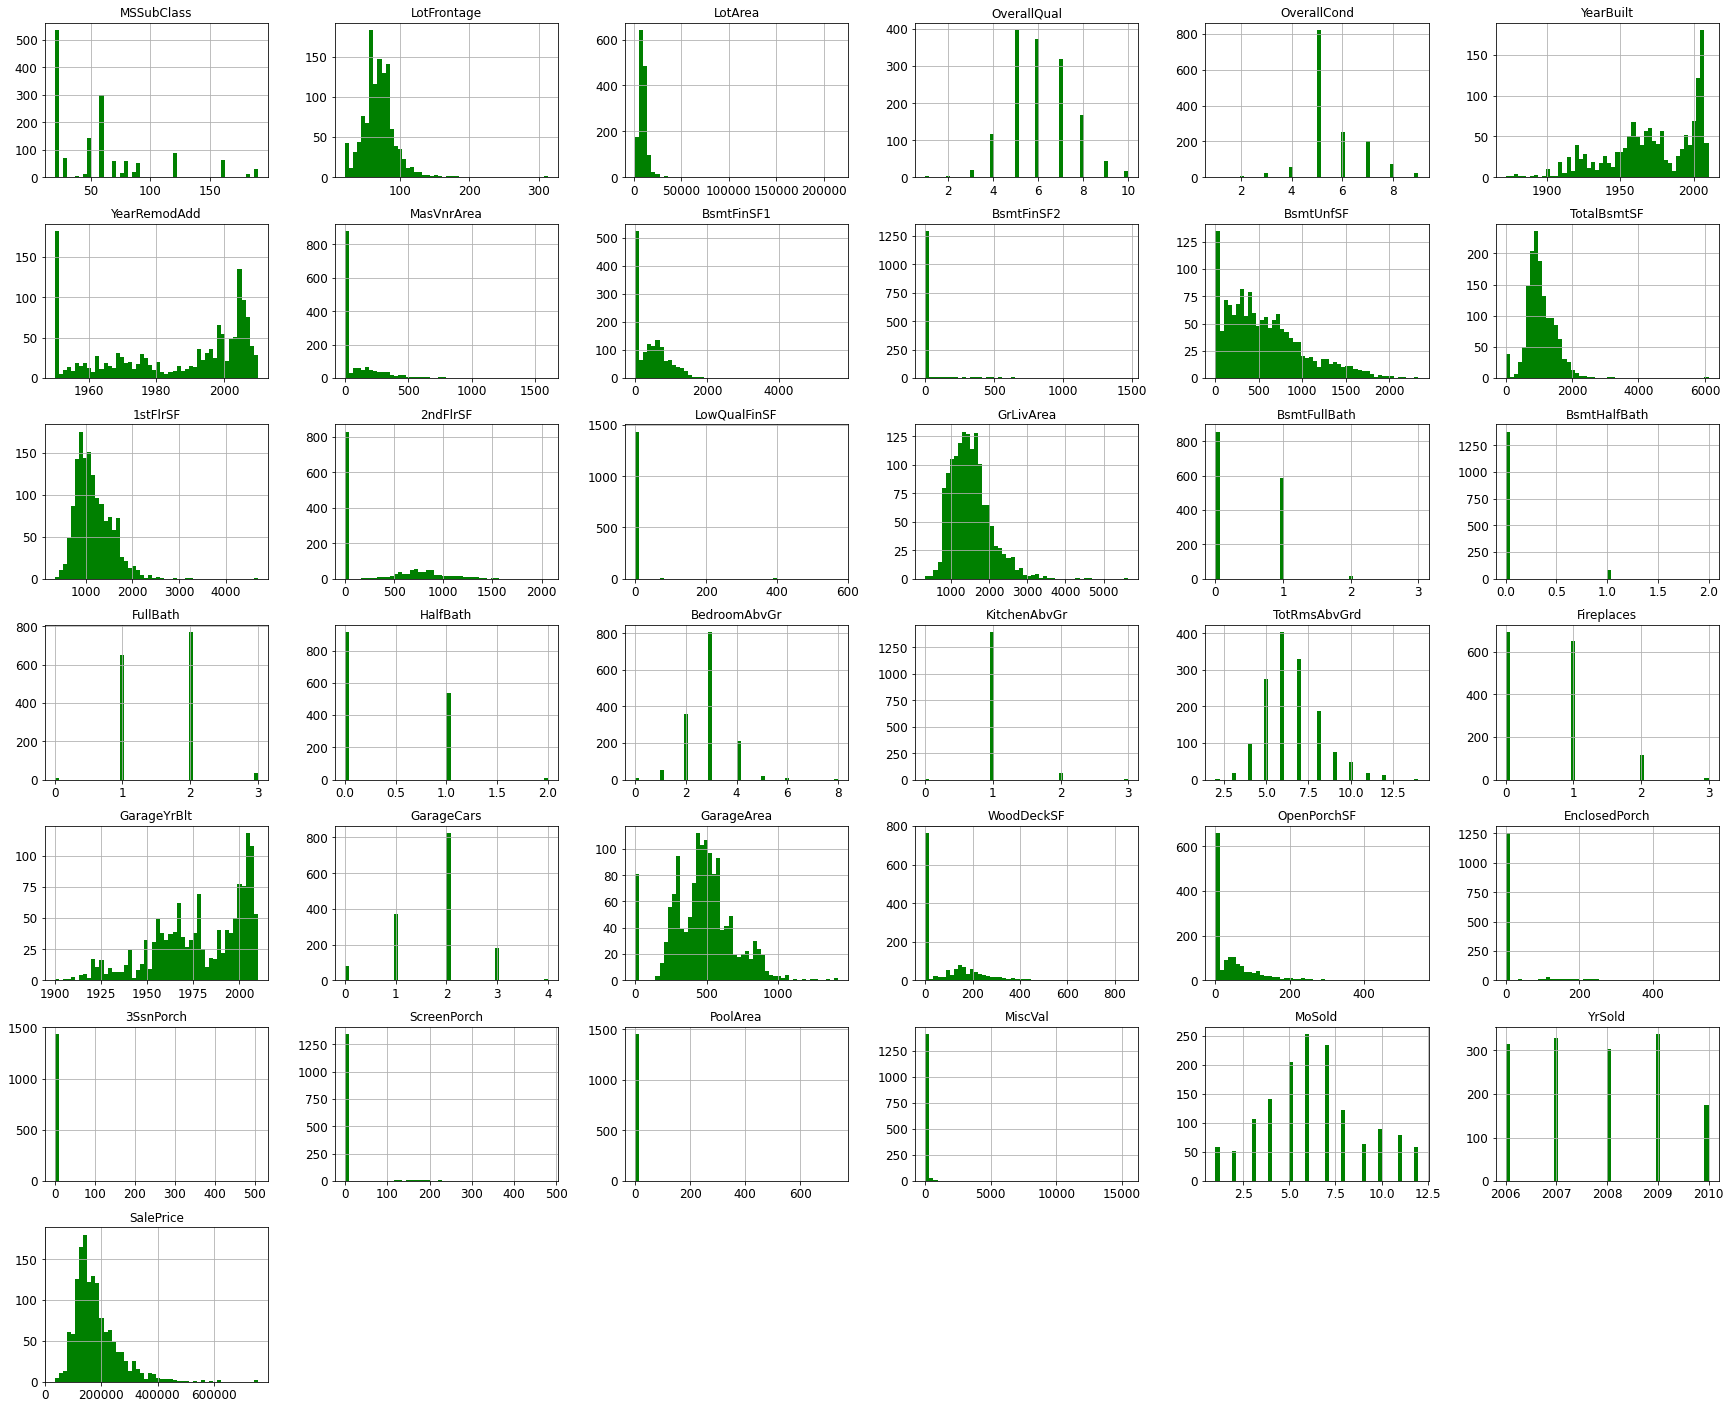

In [11]:

df_train_dup.hist(bins=50, figsize=(30,25),color='green')
#save_fig("attribute_histogram_plots")
plt.show()

### 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [12]:
df_train_dup["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [13]:
df_train_dup["SalePrice"].mean()

180921.19589041095

In [14]:
df_train_dup["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
df_train_dup["SalePrice"].mode()

0    140000
dtype: int64

Mean: $180,921.20


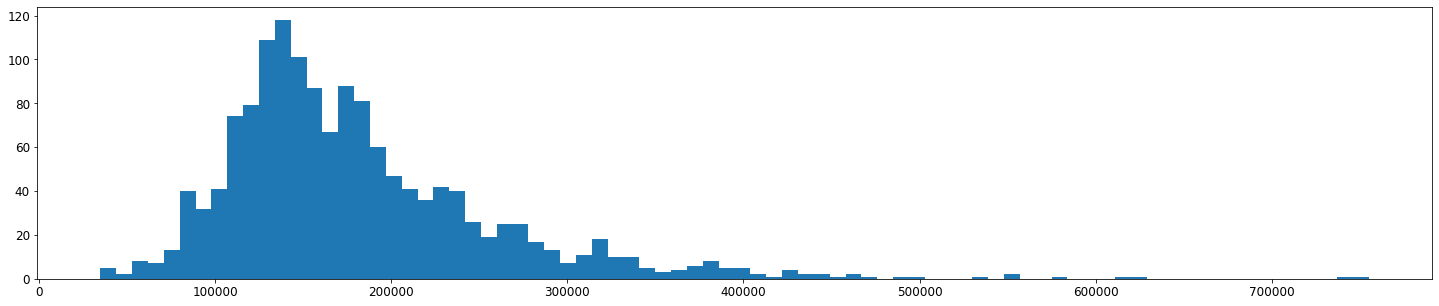

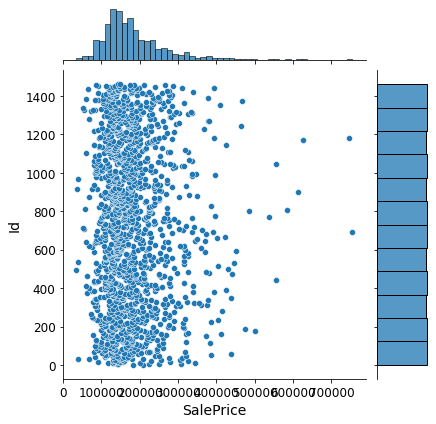

In [16]:
plt.figure(figsize = (25,5))
SalePrice = df_train_dup["SalePrice"]
plt.hist(SalePrice, bins=80)
sns.jointplot(data=df_train, x="SalePrice", y="Id")

Right skewed. The possible outliers are above $400,000

<AxesSubplot:xlabel='SalePrice'>

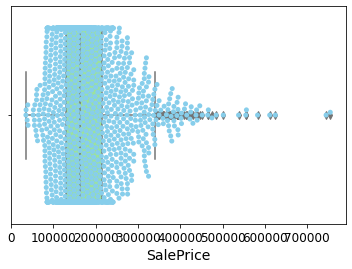

In [17]:
#view of outliers
sns.boxplot(x=SalePrice,color='lightgreen')
sns.swarmplot(x=SalePrice,color='skyblue')

### 2. Investigate missing data and outliers.

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Count:  37


<AxesSubplot:>

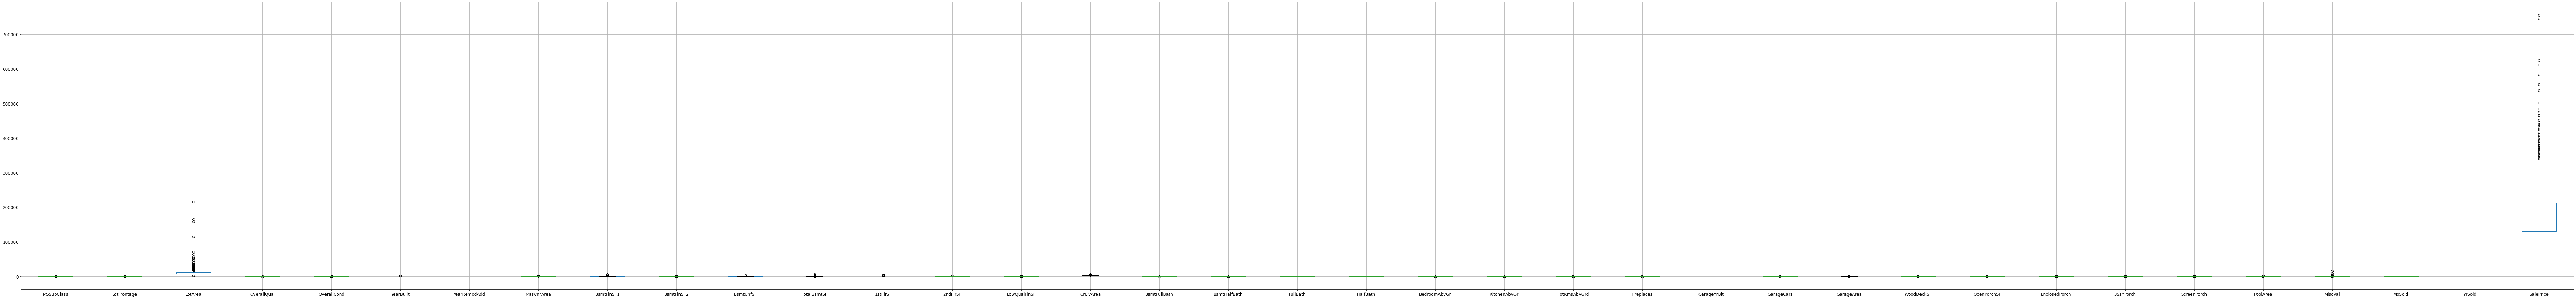

In [18]:
# Printing numeric columns and its count
num_cols = df_train_dup._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))

# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
df_train_dup.boxplot()
# Drawing box plots to check for outliers
#plt.figure(figsize = (50,50))
#for i in enumerate(num_cols):
#    plt.subplot(13,3,i[0]+1)
#    sns.boxplot(x=df_train_dup[i[1]],color='lightgreen')
#    sns.swarmplot(x=df_train_dup[i[1]],color='skyblue')
#    plt.xlabel(i[1])

From boxplots it seems many variables have outliers.

In [19]:
#looking for missing values
df_train_dup.isnull().sum()[df_train_dup.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Looking for duplicates

In [20]:
#check for duplicate
duplicate = df_train_dup.duplicated()
print(duplicate.sum())

0


### 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

In [21]:
# Printing numeric columns and its count
num_cols = df_train_dup._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Count:  37


<AxesSubplot:>

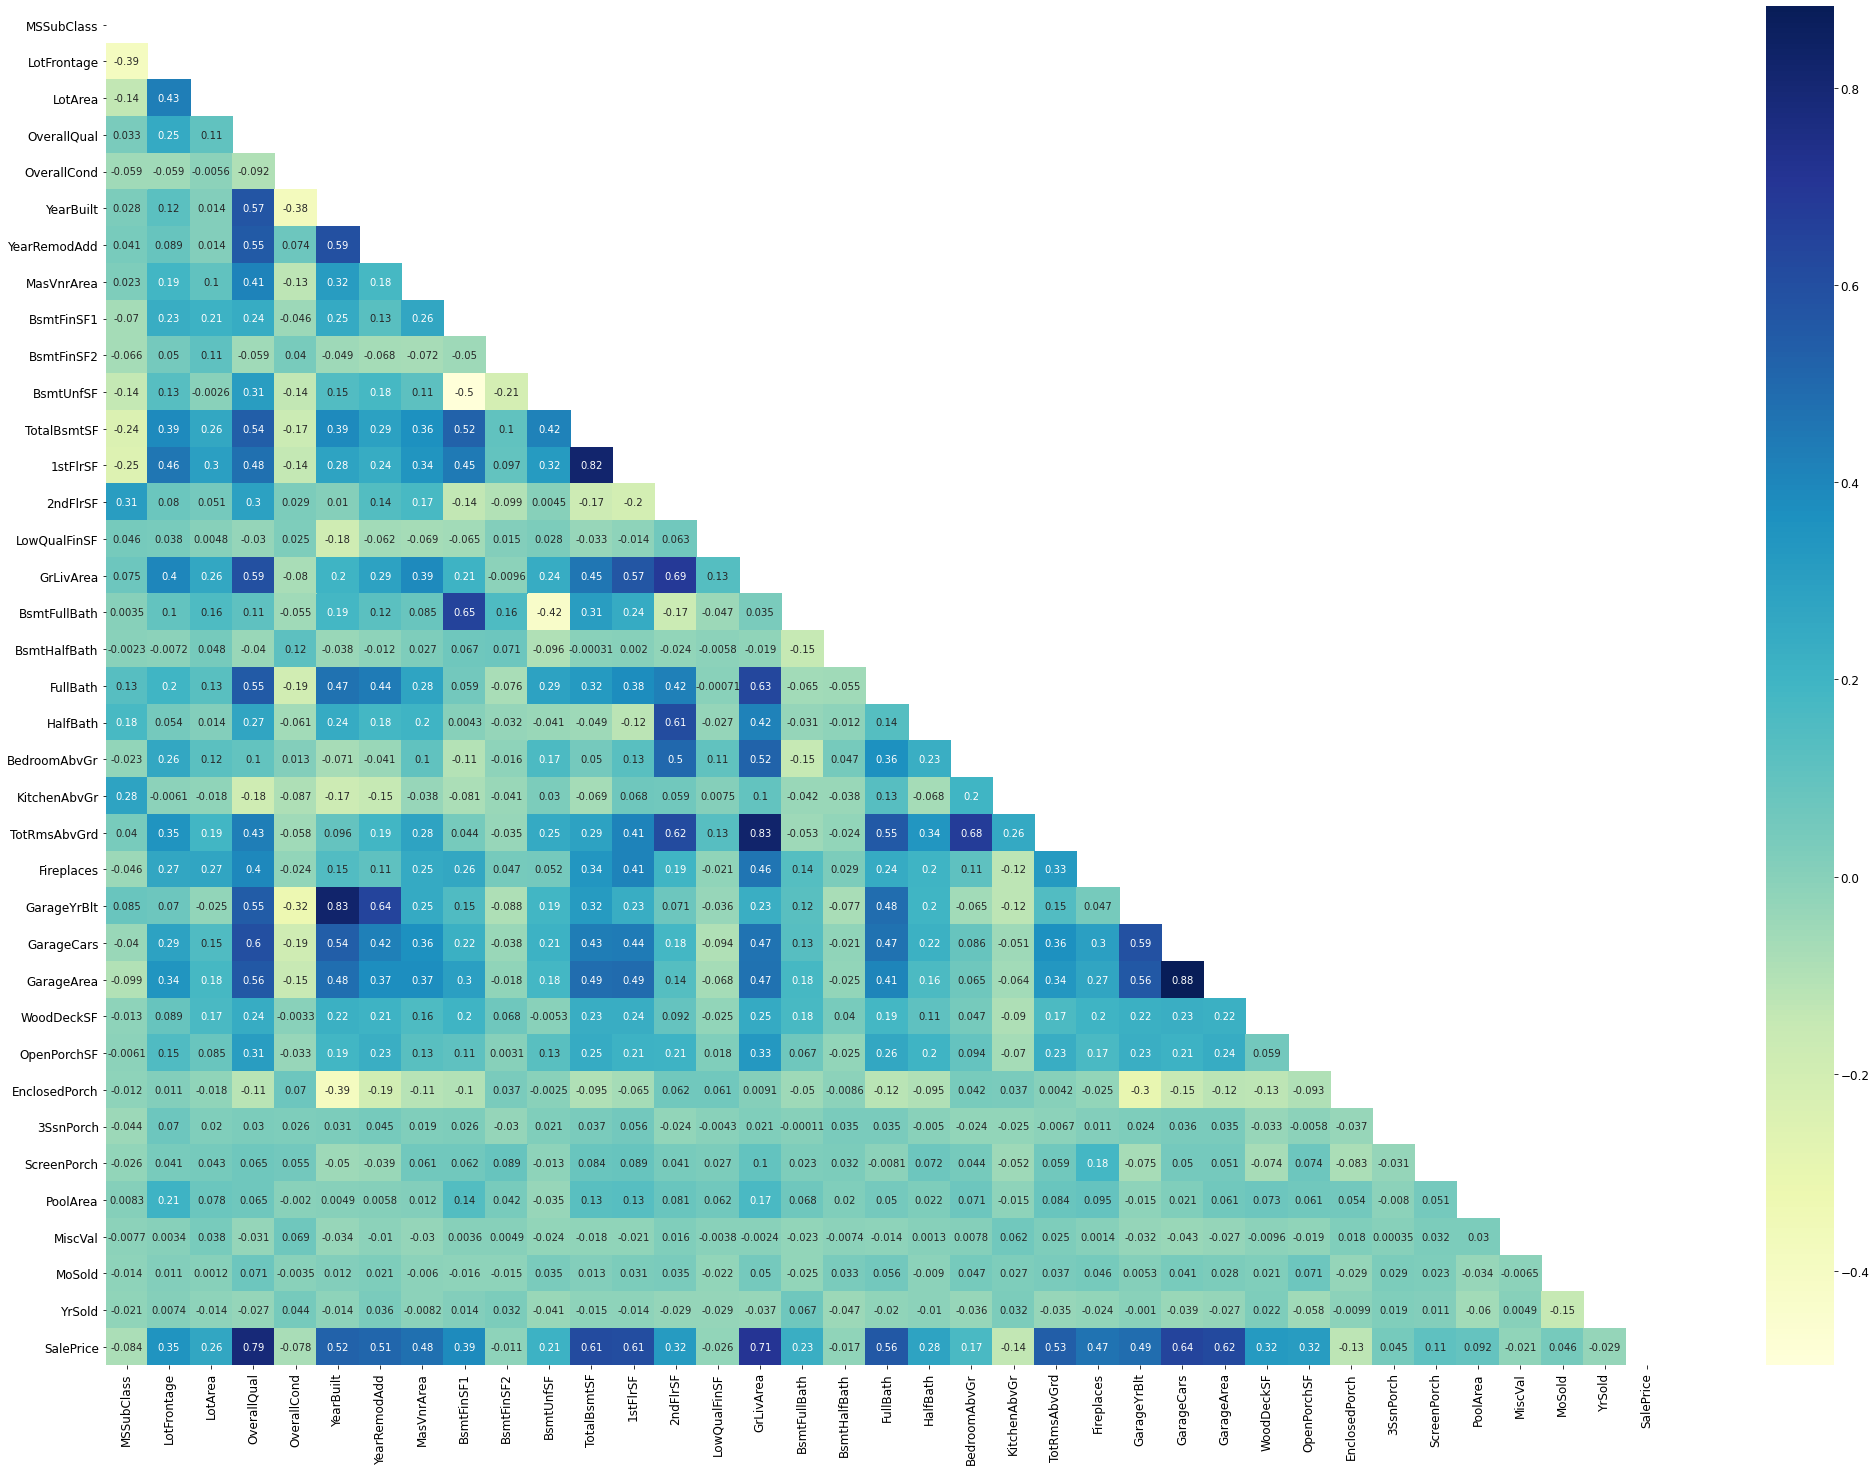

In [22]:
# Correlation among features
fig, ax = plt.subplots(figsize=(35,25))  
matrix = np.triu(df_train_dup.corr())
sns.heatmap(df_train_dup.corr(), annot=True, mask=matrix, ax=ax, cmap="YlGnBu")

In [23]:
df_train_dup.corr()['SalePrice'][(df_train_dup.corr()['SalePrice']>0.62) & (df_train_dup.corr()['SalePrice']<1)]

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [24]:
Lm = linear_model.LinearRegression()
Lm.fit(df_train_dup[['SalePrice']], df_train_dup['OverallQual'])
dependent = Lm.predict(df_train_dup[['SalePrice']])
mean_squared_error(dependent, df_train_dup['OverallQual'])

0.7155175154057534

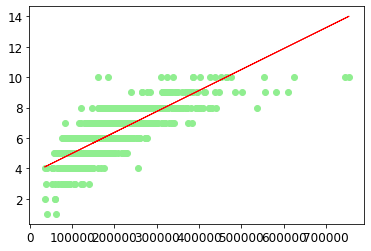

In [25]:
plt.scatter(df_train_dup['SalePrice'], df_train_dup['OverallQual'],  color='lightgreen')
plt.plot(df_train_dup['SalePrice'], dependent, color='red', linewidth=1)

In [26]:
Lm = linear_model.LinearRegression()
Lm.fit(df_train_dup[['SalePrice']], df_train_dup['GrLivArea'])
dependent = Lm.predict(df_train_dup[['SalePrice']])
mean_squared_error(dependent, df_train_dup['GrLivArea'])

137377.3521005685

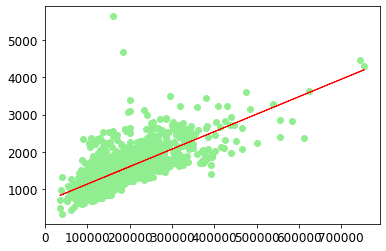

In [27]:
plt.scatter(df_train_dup['SalePrice'], df_train_dup['GrLivArea'],  color='lightgreen')
plt.plot(df_train_dup['SalePrice'], dependent, color='red', linewidth=1)

In [28]:
Lm = linear_model.LinearRegression()
Lm.fit(df_train_dup[['SalePrice']], df_train_dup['GarageCars'])
dependent = Lm.predict(df_train_dup[['SalePrice']])
mean_squared_error(dependent, df_train_dup['GarageCars'])

0.32920817981704

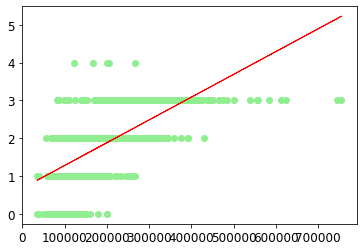

In [29]:
plt.scatter(df_train_dup['SalePrice'], df_train_dup['GarageCars'],  color='lightgreen')
plt.plot(df_train_dup['SalePrice'], dependent, color='red', linewidth=1)

In [30]:
Lm = linear_model.LinearRegression()
Lm.fit(df_train_dup[['SalePrice']], df_train_dup['GarageArea'])
dependent = Lm.predict(df_train_dup[['SalePrice']])
mean_squared_error(dependent, df_train_dup['GarageArea'])

27926.436224842077

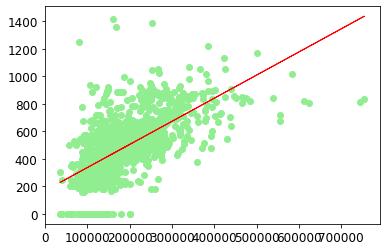

In [31]:
plt.scatter(df_train_dup['SalePrice'], df_train_dup['GarageArea'],  color='lightgreen')
plt.plot(df_train_dup['SalePrice'], dependent, color='red', linewidth=1)

Above 'GarageCars' is a possible predictor, better predictor than 'OverallQual'

In [32]:
#investigate potential predictors of the dependant variable (SalePrice)
#Regression analysis #1 OverallQual
import statsmodels.formula.api as smf
reg1_OverallQual = 'SalePrice~OverallQual'
reg1_OverallQual_Output = smf.ols(reg1_OverallQual,df_train_dup).fit()
print(reg1_OverallQual_Output.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          2.19e-313
Time:                        06:05:51   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      

In [33]:
#Regression analysis #2 GarageCars
reg2_GarageCars = 'SalePrice~GarageCars'
reg2_GarageCars_Output = smf.ols(reg2_GarageCars,df_train_dup).fit()
print(reg2_GarageCars_Output.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1014.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          2.50e-169
Time:                        06:05:52   Log-Likelihood:                -18159.
No. Observations:                1460   AIC:                         3.632e+04
Df Residuals:                    1458   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.062e+04   4102.261     14.777      0.0

In [34]:
#Regression analysis #3 GarageArea
reg3_GarageArea = 'SalePrice~GarageArea'
reg3_GarageArea_Output = smf.ols(reg3_GarageArea,df_train_dup).fit()
print(reg3_GarageArea_Output.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          5.27e-158
Time:                        06:05:52   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.136e+04   3949.003     18.070      0.0

Comparing GarageArea, GarageCars and OverallQual. 
R-squared value for OverallQual is more close to 1 that is 0.626 is the highest among 3. 

### 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

In [35]:
# Adding all finished Basements
df_train_dup['total_BsmtFinSF'] = df_train_dup['BsmtFinSF1'] + df_train_dup['BsmtFinSF2']

In [36]:
# Year of Last Construction
df_train_dup['YearLastConstruction'] = df_train_dup['YearBuilt'] +df_train_dup['YearRemodAdd']

In [37]:
# Total Baths Above
df_train_dup['total_above_Baths'] = df_train_dup['FullBath'] + (df_train_dup['HalfBath']*.5)

In [38]:
# Total Baths Above/Below
df_train_dup['total_Baths'] = df_train_dup['total_above_Baths']+df_train_dup['BsmtFullBath']+ (df_train_dup['BsmtHalfBath']*.5)

In [39]:
# Combine total finished basement sq ft with above ground
df_train_dup['total_FinSqft'] = df_train_dup['total_BsmtFinSF']+df_train_dup['GrLivArea']

In [40]:
#Get Overall Cond and Qual score
df_train_dup['OverallCondQualScore'] = df_train_dup['OverallCond'] + df_train_dup['OverallQual']/2

In [41]:
#Combining Quality with Rooms
df_train_dup['OverallQualityTotRooms'] = df_train_dup['OverallQual']+df_train_dup['TotRmsAbvGrd']

In [42]:
#Combining Condition with Rooms
df_train_dup['OverallConditionTotRooms'] = df_train_dup['OverallCond']+df_train['TotRmsAbvGrd']

In [43]:
df_train_dup.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

Run Correlation now that we have added new features

<AxesSubplot:>

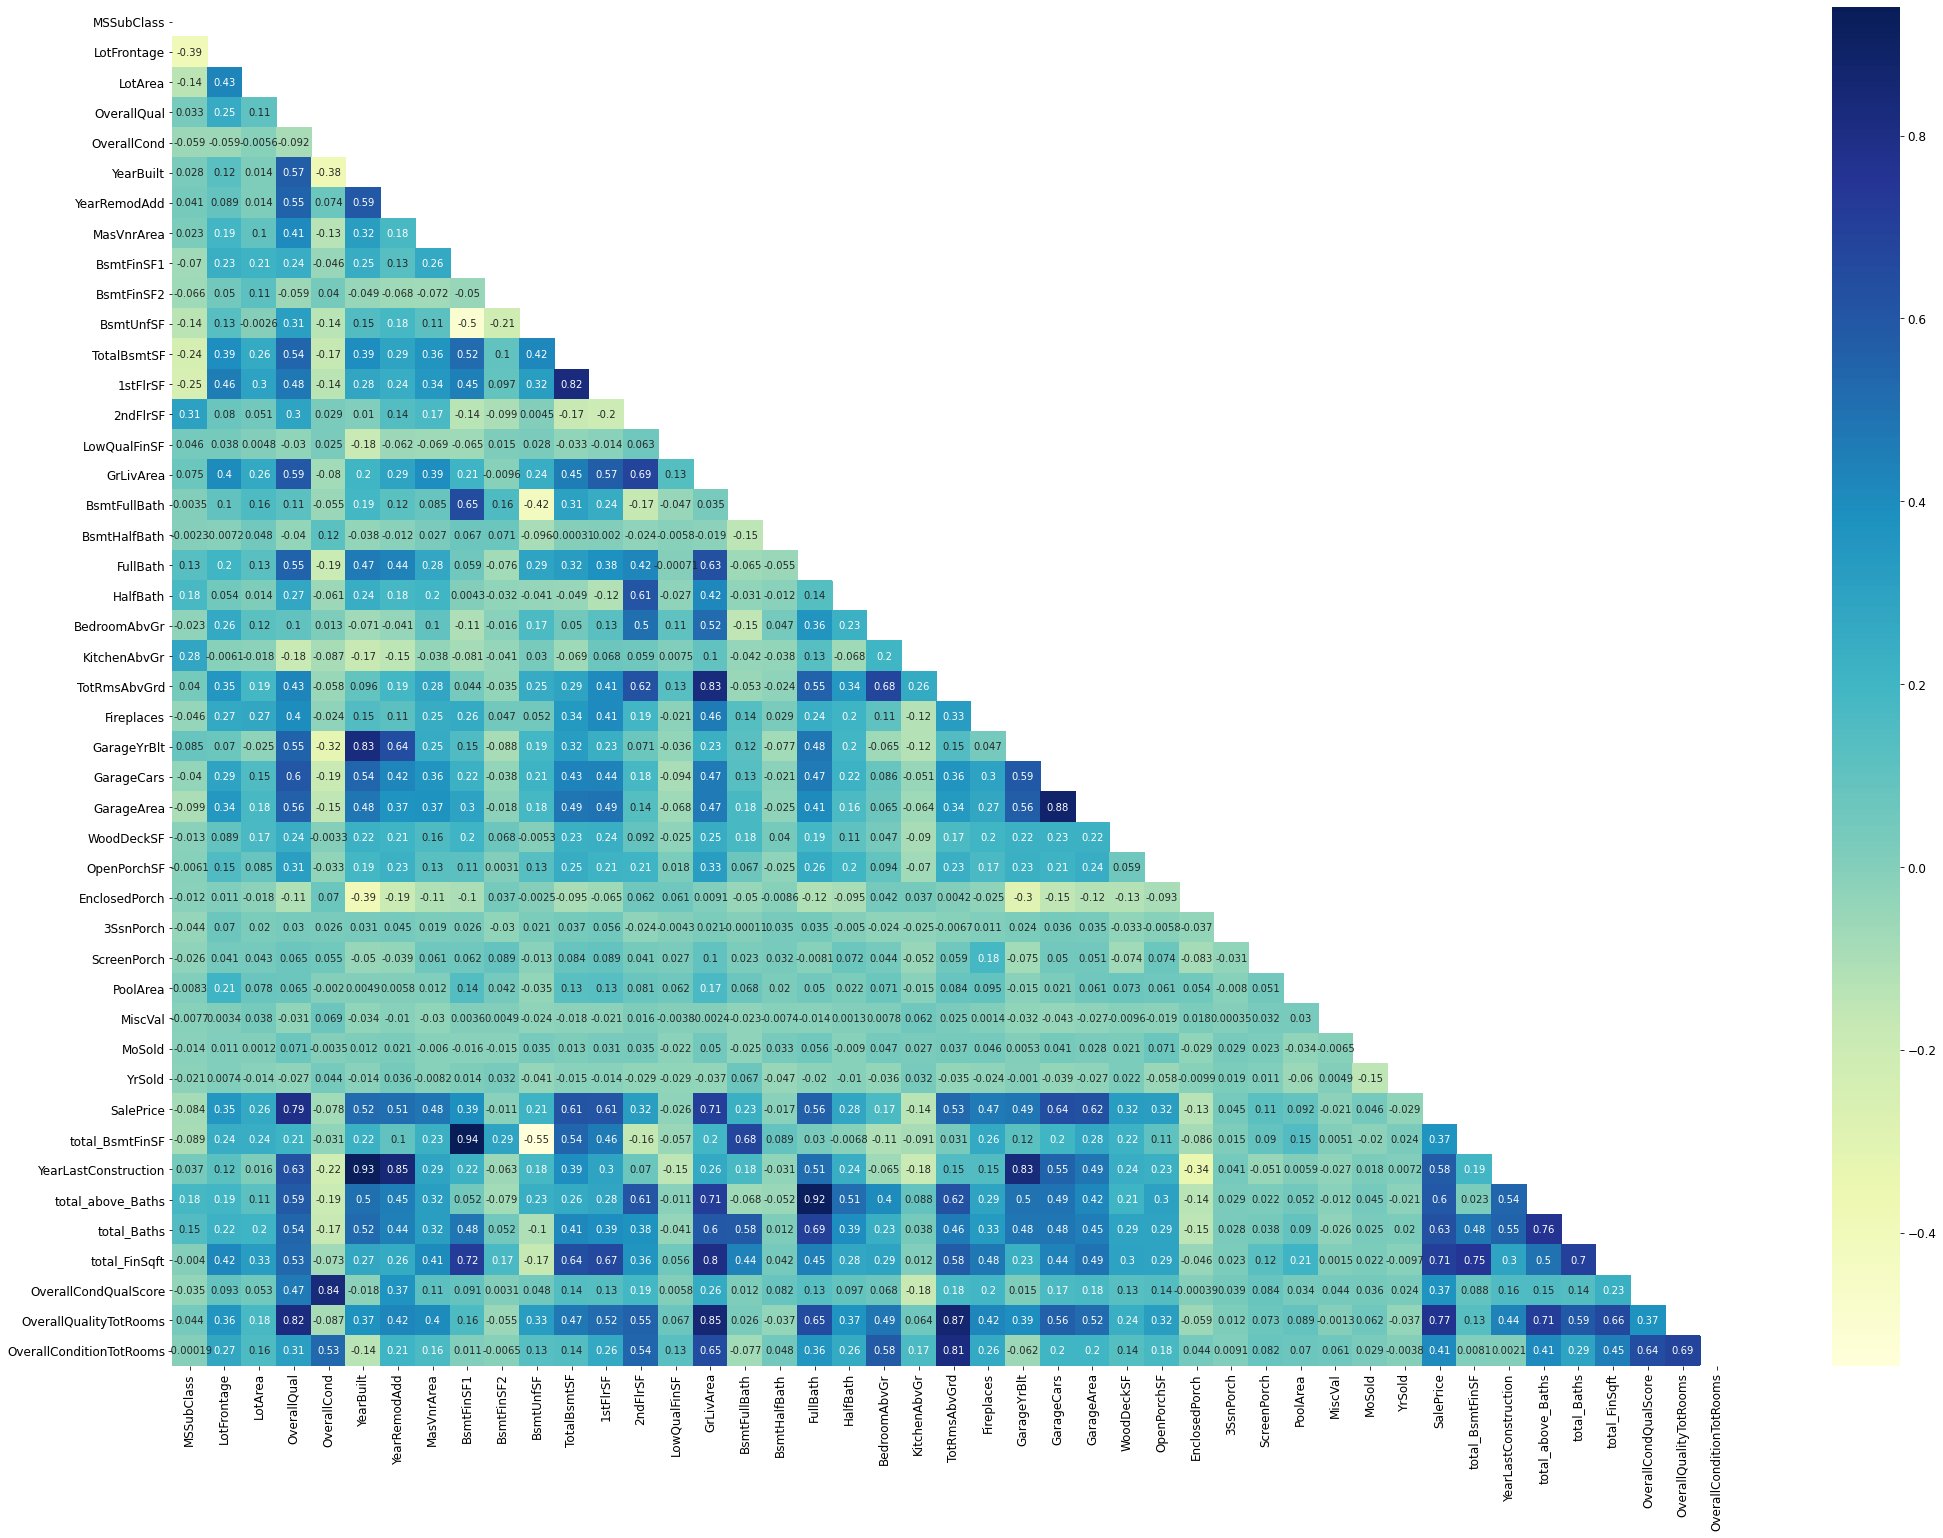

In [44]:
# Correlation among features
fig, ax = plt.subplots(figsize=(35,25))  
matrix = np.triu(df_train_dup.corr())
sns.heatmap(df_train_dup.corr(), annot=True, mask=matrix, ax=ax, cmap="YlGnBu")

In [45]:
df_train_dup.corr()['SalePrice'][(df_train_dup.corr()['SalePrice']>0.7) & (df_train_dup.corr()['SalePrice']<1)]

OverallQual               0.790982
GrLivArea                 0.708624
total_FinSqft             0.705327
OverallQualityTotRooms    0.770742
Name: SalePrice, dtype: float64

After doing merging of some features, OverallQual is a strong predictor with correlation 0.79 and also GrLivArea, 
total_FinSqft and OverallQualityTotRooms also also signifantly more than 0.7

In [46]:
reg = 'SalePrice~OverallQual'
reg_output = smf.ols(reg,df_train_dup).fit()
print(reg_output.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          2.19e-313
Time:                        06:05:57   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.621e+04   5756.407    -16.713      

In [47]:
reg = 'SalePrice~GrLivArea'
reg_output = smf.ols(reg,df_train_dup).fit()
print(reg_output.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          4.52e-223
Time:                        06:05:57   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.0

In [48]:
reg = 'SalePrice~total_FinSqft'
reg_output = smf.ols(reg,df_train_dup).fit()
print(reg_output.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1443.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          4.06e-220
Time:                        06:05:57   Log-Likelihood:                -18042.
No. Observations:                1460   AIC:                         3.609e+04
Df Residuals:                    1458   BIC:                         3.610e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.595e+04   4090.706      8.789

In [49]:
reg = 'SalePrice~OverallQualityTotRooms'
reg_output = smf.ols(reg,df_train_dup).fit()
print(reg_output.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2134.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.03e-287
Time:                        06:05:57   Log-Likelihood:                -17886.
No. Observations:                1460   AIC:                         3.578e+04
Df Residuals:                    1458   BIC:                         3.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.22

From OLS analysis also OverallQual is better predictor for saleprice as of now. 

### 5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [50]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()

df_train_dup_minmax = df_train_dup.copy()
# Printing numeric columns and its count
num_cols = df_train_dup_minmax._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))
# Printing numeric columns and its count
num_cols = df_train_dup._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))



Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'total_BsmtFinSF',
       'YearLastConstruction', 'total_above_Baths', 'total_Baths',
       'total_FinSqft', 'OverallCondQualScore', 'OverallQualityTotRooms',
       'OverallConditionTotRooms'],
      dtype='object')

Count:  45


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'total_BsmtFinSF',
       'YearLastConstruction', 'total_above_Baths', 'total_Baths',
       'total_FinSqft', 'OverallCondQualScore', 'OverallQualityTotRooms',
       'OverallConditionTotRooms'],
      dtype='object')

Count:  45


In [51]:
# transform data
df_train_dup_minmax[num_cols] = scaler.fit_transform(df_train_dup[num_cols])
df_train_dup_minmax[num_cols].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.235294     0.150685  0.033420     0.666667        0.500   0.949275   
1    0.000000     0.202055  0.038795     0.555556        0.875   0.753623   
2    0.235294     0.160959  0.046507     0.666667        0.500   0.934783   
3    0.294118     0.133562  0.038561     0.666667        0.500   0.311594   
4    0.235294     0.215753  0.060576     0.777778        0.500   0.927536   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.883333     0.12250    0.125089         0.0   0.064212     0.140098   
1      0.433333     0.00000    0.173281         0.0   0.121575     0.206547   
2      0.866667     0.10125    0.086109         0.0   0.185788     0.150573   
3      0.333333     0.00000    0.038271         0.0   0.231164     0.123732   
4      0.833333     0.21875    0.116052         0.0   0.209760     0.187398   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.119780  0.413559           0.0   0.259231      0.333333           0.0   
1  0.212942  0.000000           0.0   0.174830      0.000000           0.5   
2  0.134465  0.419370           0.0   0.273549      0.333333           0.0   
3  0.143873  0.366102           0.0   0.260550      0.333333           0.0   
4  0.186095  0.509927           0.0   0.351168      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.666667       0.5         0.375      0.333333      0.500000    0.000000   
1  0.666667       0.0         0.375      0.333333      0.333333    0.333333   
2  0.666667       0.5         0.375      0.333333      0.333333    0.333333   
3  0.333333       0.0         0.375      0.333333      0.416667    0.333333   
4  0.666667       0.5         0.500      0.333333      0.583333    0.333333   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.936364        0.50    0.386460    0.000000     0.111517   
1     0.690909        0.50    0.324401    0.347725     0.000000   
2     0.918182        0.50    0.428773    0.000000     0.076782   
3     0.890909        0.75    0.452750    0.000000     0.063985   
4     0.909091        0.75    0.589563    0.224037     0.153565   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0       0.000000        0.0          0.0       0.0      0.0  0.090909    0.50   
1       0.000000        0.0          0.0       0.0      0.0  0.363636    0.25   
2       0.000000        0.0          0.0       0.0      0.0  0.727273    0.50   
3       0.492754        0.0          0.0       0.0      0.0  0.090909    0.00   
4       0.000000        0.0          0.0       0.0      0.0  1.000000    0.50   

   SalePrice  total_BsmtFinSF  YearLastConstruction  total_above_Baths  \
0   0.241078         0.125089              0.926316           0.714286   
1   0.203583         0.173281              0.642105           0.571429   
2   0.261908         0.086109              0.910526           0.714286   
3   0.145952         0.038271              0.289474           0.285714   
4   0.298709         0.116052              0.894737           0.714286   

   total_Baths  total_FinSqft  OverallCondQualScore  OverallQualityTotRooms  \
0          0.5       0.190102                  0.56                0.631579   
1          0.3       0.174032                  0.76                0.473684   
2          0.5       0.176954                  0.56                0.526316   
3          0.2       0.146001                  0.56                0.578947   
4          0.5       0.230004                  0.60                0.736842   

   OverallConditionTotRooms  
0                    0.5000  
1                    0.5625  
2                    0.3750  
3                    0.4375  
4                    0.5625

In [52]:
df_train_dup[num_cols].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  total_BsmtFinSF  YearLastConstruction  total_above_Baths  \
0     208500              706                  4006                2.5   
1     181500              978                  3952                2.0   
2     223500              486                  4003                2.5   
3     140000              216                  3885                1.0   
4     250000              655                  4000                2.5   

   total_Baths  total_FinSqft  OverallCondQualScore  OverallQualityTotRooms  \
0          3.5           2416                   8.5                      15   
1          2.5           2240                  11.0                      12   
2          3.5           2272                   8.5                      13   
3          2.0           1933                   8.5                      14   
4          3.5           2853                   9.0                      17   

   OverallConditionTotRooms  
0                        13  
1                        14  
2                        11  
3                        12  
4                        14

<AxesSubplot:>

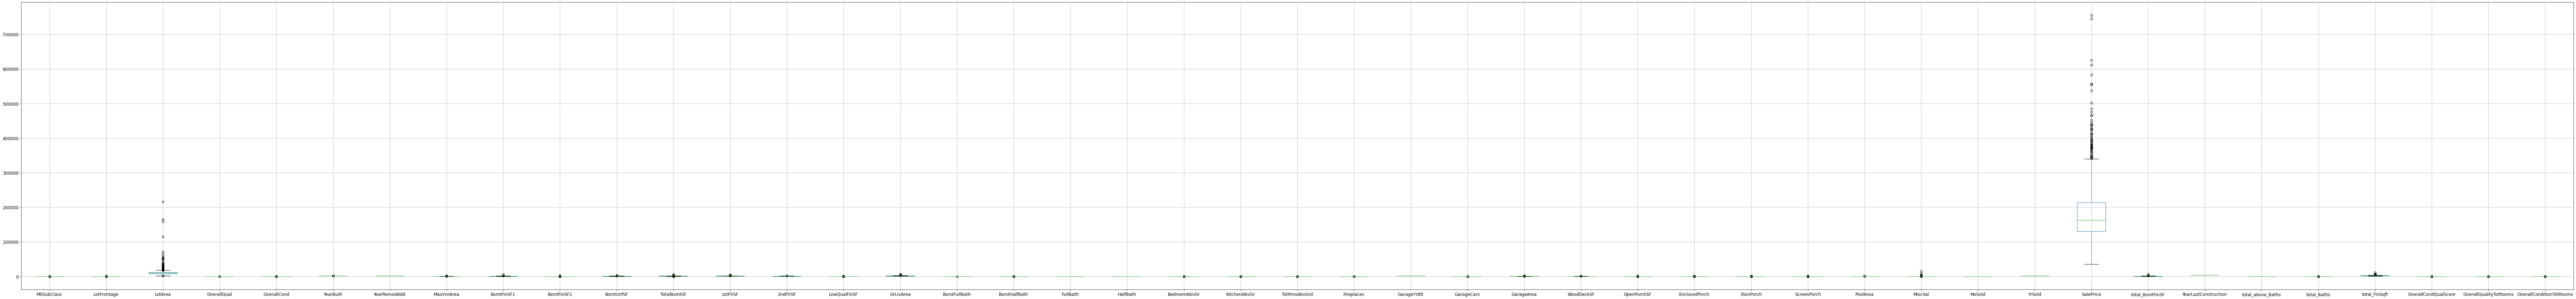

In [53]:
plt.figure(figsize = (130,15))
df_train_dup.boxplot()

<AxesSubplot:>

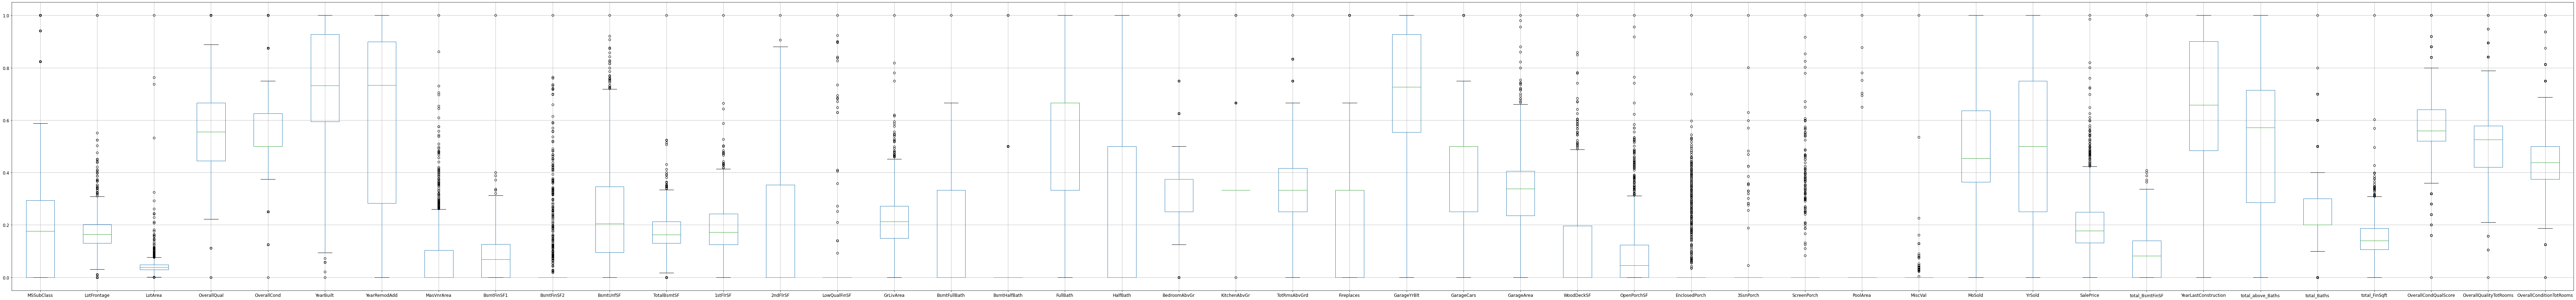

In [54]:
plt.figure(figsize = (130,15))
df_train_dup_minmax.boxplot()

In [55]:
# Printing numeric columns and its count
num_cols = df_train_dup_minmax._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))

# Drawing box plots to check for outliers
#plt.figure(figsize = (50,50))
#for i in enumerate(num_cols):
#    plt.subplot(13,3,i[0]+1)
#    sns.boxplot(x=df_train_dup_minmax[i[1]],color='lightgreen')
#    sns.swarmplot(x=df_train_dup_minmax[i[1]],color='skyblue')
#    plt.xlabel(i[1])

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'total_BsmtFinSF',
       'YearLastConstruction', 'total_above_Baths', 'total_Baths',
       'total_FinSqft', 'OverallCondQualScore', 'OverallQualityTotRooms',
       'OverallConditionTotRooms'],
      dtype='object')

Count:  45


In [56]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

from scipy.stats import zscore

df_train_dup_stdscaler = df_train_dup.copy()
# Printing numeric columns and its count
num_cols = df_train_dup_stdscaler._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))
# Printing numeric columns and its count
num_cols = df_train_dup._get_numeric_data().columns 
display(num_cols)
print("Count: ", len(num_cols))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'total_BsmtFinSF',
       'YearLastConstruction', 'total_above_Baths', 'total_Baths',
       'total_FinSqft', 'OverallCondQualScore', 'OverallQualityTotRooms',
       'OverallConditionTotRooms'],
      dtype='object')

Count:  45


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'total_BsmtFinSF',
       'YearLastConstruction', 'total_above_Baths', 'total_Baths',
       'total_FinSqft', 'OverallCondQualScore', 'OverallQualityTotRooms',
       'OverallConditionTotRooms'],
      dtype='object')

Count:  45


In [57]:
for i in num_cols:
  df_train_dup_stdscaler[i] = std_scale.fit_transform(df_train_dup_stdscaler[[i]])
print(df_train_dup_stdscaler.head())


   MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0    0.073375       RL    -0.208034 -0.207142   Pave   NaN      Reg   
1   -0.872563       RL     0.409895 -0.091886   Pave   NaN      Reg   
2    0.073375       RL    -0.084449  0.073480   Pave   NaN      IR1   
3    0.309859       RL    -0.414011 -0.096897   Pave   NaN      IR1   
4    0.073375       RL     0.574676  0.375148   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     0.651479    -0.517200   1.050994   


<AxesSubplot:>

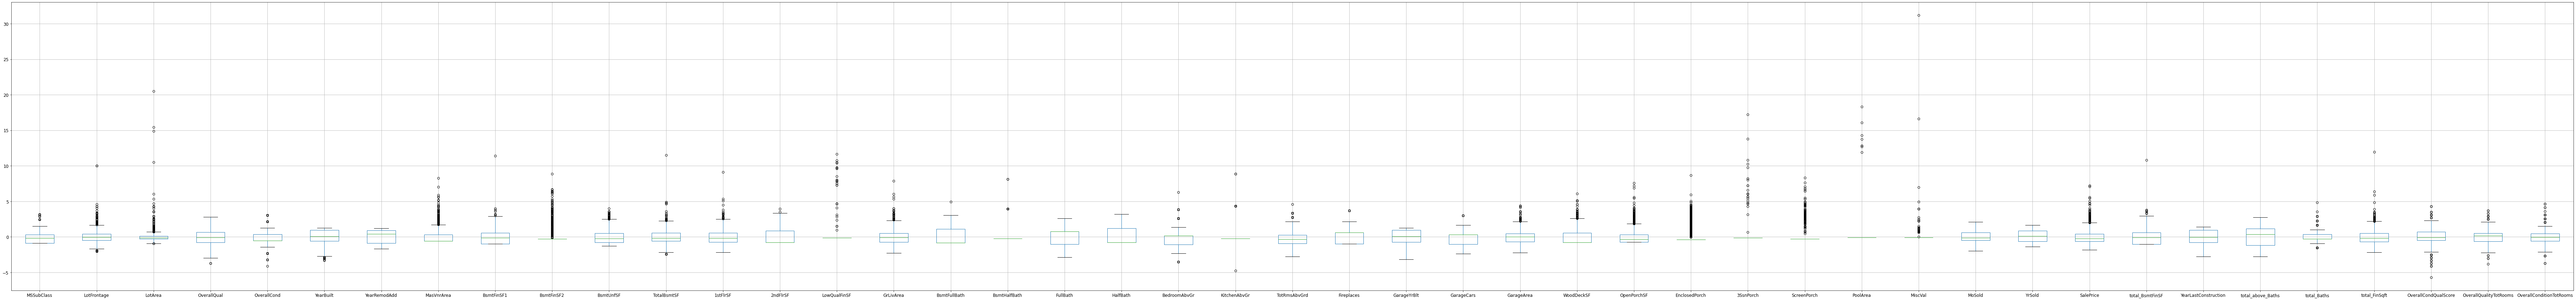

In [58]:
plt.figure(figsize = (130,15))
df_train_dup_stdscaler.boxplot()

After Scaling in the boxplots you can see those features with biggest outliers: Mis Value (#1), followed by Lot Area,Pool Areas, and 3SsnPorch are some others with noticeable outliers

In [59]:
# Drawing box plots to check outliers
#plt.figure(figsize = (50,50))
#for i in enumerate(num_cols):
#    plt.subplot(13,3,i[0]+1)
#    sns.boxplot(x=df_train_dup_stdscaler[i[1]],color='lightgreen')
#    sns.swarmplot(x=df_train_dup_stdscaler[i[1]],color='skyblue')
#    plt.xlabel(i[1])

## Module 2 Assignment Questions
1. Conduct your analysis using a cross-validation design.
2. Conduct EDA and provide appropriate visualizations in the process.
3. Build a minimum of two separate regression models using the training set.
4. Evaluate polynomial, indicator, dichotomous, & piecewise model components.
5. Create at least one feature from the data set.
6. Evaluate the models’ assumptions.
7. Evaluate goodness of fit metrics on the training and validation sets.
8. Submit predictions for the unseen test set available on Kaggle.com.
9. Provide your Kaggle user name and a screen snapshot of your Kaggle scores.
10. Discuss what your models tell you in layman’s terms

In [60]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#!conda install --yes xgboost
import xgboost

%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

#stats model
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf

# Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#!conda install --yes lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

# Model Accuracy
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_poisson_deviance, mean_squared_error 

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [61]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [62]:
df_train_dup = df_train.copy()
df_test_dup = df_test.copy()

In [63]:
#df_train_dup.head()

In [64]:
#df_train_dup.tail()

In [65]:
#df_train_dup.describe()

In [66]:
#df_train_dup.shape[0]

In [67]:
#df_train_dup['Id'].describe()


In [68]:
# from numpy.random import seed
# from numpy.random import randint

# seed(13)
# # generate some integers
# df_train_dup_id_rand = randint(0,df_train_dup.shape[0]-1,df_train_dup.shape[0])
# df_train_dup_id_rand

In [69]:
#df_train_dup.loc[df_train_dup_id_rand[0]]
#df_train_dup.loc[0:3,]

In [70]:

# part_rows_count=int(df_train_dup.shape[0]/5)
# print(part_rows_count)
# row_from=0
# row_to=part_rows_count
# df_train_dup_1 = df_train_dup.loc[df_train_dup_id_rand[row_from:row_to],]
# df_train_dup_1.shape


In [71]:
# row_from=part_rows_count
# row_to=part_rows_count*2
# df_train_dup_2 = df_train_dup.loc[df_train_dup_id_rand[row_from:row_to],]
# df_train_dup_2.shape

In [72]:
# row_from=part_rows_count*2
# row_to=part_rows_count*3
# df_train_dup_3 = df_train_dup.loc[df_train_dup_id_rand[row_from:row_to],]
# df_train_dup_3.shape

In [73]:
# row_from=part_rows_count*3
# row_to=part_rows_count*4
# df_train_dup_4 = df_train_dup.loc[df_train_dup_id_rand[row_from:row_to],]
# df_train_dup_4.shape

In [74]:
# row_from=part_rows_count*4
# row_to=part_rows_count*5
# df_train_dup_5 = df_train_dup.loc[df_train_dup_id_rand[row_from:row_to],]
# df_train_dup_5.shape

In [75]:
# df_train_dup_1.head()

In [76]:
# df_train_dup_1.tail()

In [77]:
# df_train_dup_2.head()

In [78]:
# df_train_dup_2.tail()

In [79]:
# df_train_dup_3.head()

In [80]:
# df_train_dup_3.tail()

In [81]:
# df_train_dup_4.head()

In [82]:
# df_train_dup_4.tail()

In [83]:
# df_train_dup_5.head()

In [84]:
# df_train_dup_5.tail()

In [85]:
# # devided train data to 5 sub-parts and creating 4 k-fold train and 1 k-fold test data sets with 5 samples to train and test 
# df_train_dup_kfold_1 = df_train_dup_2.append(df_train_dup_3, ignore_index=True)
# df_train_dup_kfold_1 = df_train_dup_kfold_1.append(df_train_dup_4, ignore_index=True)
# df_train_dup_kfold_1 = df_train_dup_kfold_1.append(df_train_dup_5, ignore_index=True)
# df_train_dup_kfold_1.shape

In [86]:
# df_test_dup_kfold_1 = df_train_dup_1.copy()
# df_test_dup_kfold_1.shape

In [87]:
# df_train_dup_kfold_2 = df_train_dup_1.append(df_train_dup_3, ignore_index=True)
# df_train_dup_kfold_2 = df_train_dup_kfold_2.append(df_train_dup_4, ignore_index=True)
# df_train_dup_kfold_2 = df_train_dup_kfold_2.append(df_train_dup_5, ignore_index=True)
# df_train_dup_kfold_2.shape

In [88]:
# df_test_dup_kfold_2 = df_train_dup_2.copy()
# df_test_dup_kfold_2.shape

In [89]:
# df_train_dup_kfold_3 = df_train_dup_1.append(df_train_dup_2, ignore_index=True)
# df_train_dup_kfold_3 = df_train_dup_kfold_3.append(df_train_dup_4, ignore_index=True)
# df_train_dup_kfold_3 = df_train_dup_kfold_3.append(df_train_dup_5, ignore_index=True)
# df_train_dup_kfold_3.shape

In [90]:
# df_test_dup_kfold_3 = df_train_dup_3.copy()
# df_test_dup_kfold_3.shape

In [91]:
# df_train_dup_kfold_4 = df_train_dup_1.append(df_train_dup_2, ignore_index=True)
# df_train_dup_kfold_4 = df_train_dup_kfold_4.append(df_train_dup_3, ignore_index=True)
# df_train_dup_kfold_4 = df_train_dup_kfold_4.append(df_train_dup_5, ignore_index=True)
# df_train_dup_kfold_4.shape

In [92]:
# df_test_dup_kfold_4 = df_train_dup_4.copy()
# df_test_dup_kfold_4.shape

In [93]:
# df_train_dup_kfold_5 = df_train_dup_1.append(df_train_dup_2, ignore_index=True)
# df_train_dup_kfold_5 = df_train_dup_kfold_5.append(df_train_dup_3, ignore_index=True)
# df_train_dup_kfold_5 = df_train_dup_kfold_5.append(df_train_dup_4, ignore_index=True)
# df_train_dup_kfold_5.shape

In [94]:
# df_test_dup_kfold_5 = df_train_dup_5.copy()
# df_test_dup_kfold_5.shape

In [95]:
# Import librairies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [96]:
# Missing data percentage - Train
print("Train dataset Missing data: ")
total = df_train_dup.isnull().sum().sort_values(ascending=False)
percent = (df_train_dup.isnull().sum()*100/df_train_dup.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(10)

Train dataset Missing data: 


Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945

In [97]:
# Missing data percentage - Test
print("Test dataset Missing data: ")
total = df_test_dup.isnull().sum().sort_values(ascending=False)
percent = (df_test_dup.isnull().sum()*100/df_test_dup.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(10)

Test dataset Missing data: 


Total    Percent
PoolQC         1456  99.794380
MiscFeature    1408  96.504455
Alley          1352  92.666210
Fence          1169  80.123372
FireplaceQu     730  50.034270
LotFrontage     227  15.558602
GarageYrBlt      78   5.346127
GarageQual       78   5.346127
GarageFinish     78   5.346127
GarageCond       78   5.346127

In [98]:
df_train_without_miss = df_train_dup.drop((missing_data_train[missing_data_train['Total'] > 100]).index,1)
df_test_without_miss = df_test_dup.drop((missing_data_test[missing_data_test['Total'] > 100]).index,1)

In [99]:
# Missing data percentage - Train
print("Train dataset Missing data: ")
total = df_train_without_miss.isnull().sum().sort_values(ascending=False)
percent = (df_train_without_miss.isnull().sum()*100/df_train_without_miss.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(15)

Train dataset Missing data: 


Total   Percent
GarageType       81  5.547945
GarageCond       81  5.547945
GarageYrBlt      81  5.547945
GarageFinish     81  5.547945
GarageQual       81  5.547945
BsmtFinType2     38  2.602740
BsmtExposure     38  2.602740
BsmtFinType1     37  2.534247
BsmtCond         37  2.534247
BsmtQual         37  2.534247
MasVnrArea        8  0.547945
MasVnrType        8  0.547945
Electrical        1  0.068493
PavedDrive        0  0.000000
WoodDeckSF        0  0.000000

In [100]:
# Missing data percentage - Test
print("Test dataset Missing data: ")
total = df_test_without_miss.isnull().sum().sort_values(ascending=False)
percent = (df_test_without_miss.isnull().sum()*100/df_test_without_miss.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

Test dataset Missing data: 


Total   Percent
GarageYrBlt      78  5.346127
GarageFinish     78  5.346127
GarageQual       78  5.346127
GarageCond       78  5.346127
GarageType       76  5.209047
BsmtCond         45  3.084304
BsmtExposure     44  3.015764
BsmtQual         44  3.015764
BsmtFinType1     42  2.878684
BsmtFinType2     42  2.878684
MasVnrType       16  1.096642
MasVnrArea       15  1.028101
MSZoning          4  0.274160
BsmtFullBath      2  0.137080
Utilities         2  0.137080
Functional        2  0.137080
BsmtHalfBath      2  0.137080
BsmtFinSF1        1  0.068540
BsmtFinSF2        1  0.068540
BsmtUnfSF         1  0.068540

In [101]:
# Check for missing value in any column
df_train_without_miss.isnull().sum()[df_train_without_miss.isnull().sum()>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [102]:
df_test_without_miss.isnull().sum()[df_test_without_miss.isnull().sum()>0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [103]:
#List of Categorical Columns
cate_cols = df_train_without_miss.select_dtypes(include = ['O']).columns
cate_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [104]:
#List of Numerical Columns
num_cols = df_train_without_miss._get_numeric_data().columns 
num_cols

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [105]:
#Imputing all categorical variable with mode
for col in cate_cols:
    df_train_without_miss[col] = df_train_without_miss[col].fillna(df_train_without_miss[col].mode()[0])

In [106]:
#Imputing all numerical variable with mean
for col in num_cols:
    df_train_without_miss[col] = df_train_without_miss[col].fillna(df_train_without_miss[col].mean())

In [107]:
# Check for missing value in any column
df_train_without_miss.isnull().sum()[df_train_without_miss.isnull().sum()>0]

Series([], dtype: int64)

In [108]:
#List of Categorical Columns
cate_cols = df_test_without_miss.select_dtypes(include = ['O']).columns
cate_cols
#List of Numerical Columns
num_cols = df_test_without_miss._get_numeric_data().columns 
num_cols
#Imputing all categorical variable with mode
for col in cate_cols:
    df_test_without_miss[col] = df_test_without_miss[col].fillna(df_test_without_miss[col].mode()[0])
#Imputing all numerical variable with mean
for col in num_cols:
    df_test_without_miss[col] = df_test_without_miss[col].fillna(df_test_without_miss[col].mean())
# Check for missing value in any column
df_test_without_miss.isnull().sum()[df_test_without_miss.isnull().sum()>0]

Series([], dtype: int64)

In [109]:
df_train_without_miss.shape

(1460, 75)

In [110]:
df_test_without_miss.shape

(1459, 74)

In [111]:
#Combinig train and test data.
ntrain = df_train_without_miss.shape[0]
ntest = df_test_without_miss.shape[0]
y_train = df_train_without_miss.SalePrice.values
all_data = pd.concat((df_train_without_miss, df_test_without_miss)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 74)


In [112]:
all_data_encoded = pd.get_dummies(all_data)
all_data_encoded.shape

(2919, 270)

In [113]:
train_df_reg1=all_data_encoded[0:ntrain]
train_df_reg1.shape

(1460, 270)

In [114]:
test_df_reg1=all_data_encoded[ntrain:]
test_df_reg1.shape

(1459, 270)

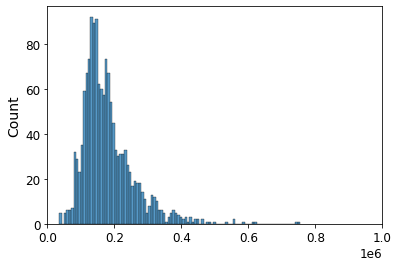

In [115]:
#Checking the skewness of Dependent variable and normalising with log
sns.histplot(x=y_train,bins = 100)
plt.xlim([0,1000000]);

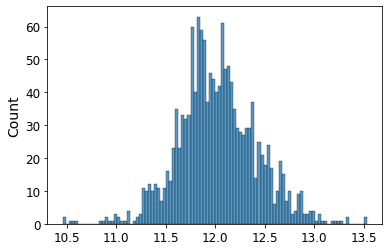

In [116]:
y_train_log = np.log1p(y_train)
sns.histplot(x=y_train_log,bins = 100);

In [117]:
#Basic linear regression

train_df_reg1["SalesPrice"] = y_train_log
# train-test 80-20 split
df_train_reg, df_test_reg = train_test_split(train_df_reg1, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = df_train_reg.pop('SalesPrice')
X_train_1 = df_train_reg

y_test_1 = df_test_reg.pop('SalesPrice')
X_test_1 = df_test_reg

#Regression
model = LinearRegression()
model.fit(X_train_1, y_train_1)
predicted_prices_regr = model.predict(X_test_1)

#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_regr, squared=False)
rmse

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  

<ipython-input-117-de081c68164f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_reg1["SalesPrice"] = y_train_log


R^2 Scores:  [-3.94482544e+06  8.90494580e-01  9.08707919e-01  9.23516295e-01
  8.98622333e-01]

RMSE Scores:  [-7.74656330e+02 -1.33439114e-01 -1.14925387e-01 -1.12436858e-01
 -1.28971236e-01]


In [118]:
X_test_1=test_df_reg1
predicted_prices_regr = model.predict(X_test_1)
len(predicted_prices_regr)

1459

In [119]:
pred_sale_price=np.expm1(predicted_prices_regr)

In [120]:
result = pd.DataFrame({'Id': X_test_1.Id, 'SalePrice': pred_sale_price})
result.to_csv('result_linear.csv', index=False)
result.head()

Id      SalePrice
1460  1461  116202.601022
1461  1462  108201.265990
1462  1463  181167.126117
1463  1464  198443.436402
1464  1465  193350.361717

In [121]:
#Polinomial regression

train_df_reg1["SalesPrice"] = y_train_log
# train-test 80-20 split
df_train_reg, df_test_reg = train_test_split(train_df_reg1, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = df_train_reg.pop('SalesPrice')
X_train_1 = df_train_reg

y_test_1 = df_test_reg.pop('SalesPrice')
X_test_1 = df_test_reg

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train_1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train_1)
predicted_prices_pol = lin_reg_2.predict(poly_reg.transform(X_test_1))

#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_pol, squared=False)
rmse

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 13)
scores = cross_val_score(lin_reg_2, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 13)
scores = cross_val_score(lin_reg_2, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores) 

<ipython-input-121-df9fbf0433c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_reg1["SalesPrice"] = y_train_log


R^2 Scores:  [-3.94482544e+06  8.90494580e-01  9.08707919e-01  9.23516295e-01
  8.98622333e-01]

RMSE Scores:  [-7.74656330e+02 -1.33439114e-01 -1.14925387e-01 -1.12436858e-01
 -1.28971236e-01]


## Module 3 Assignment Questions
1. Conduct your analysis using a cross-validation design.
2. Conduct / improve upon previous EDA.
3. Build models with many variables.
4. Transform and feature engineer as appropriate.
5. Build at a minimum the following regression models.
    1. Lasso
    2. Ridge
    3. ElasticNet
6. Conduct hyperparameter tuning for the ElasticNet.
7. Evaluate performance of the model using the Kaggle metric upon which your scores are evaluated.
8. Submit at least two models to Kaggle.com for evaluation. Provider your Kaggle.com user name and screen snapshots of your Kaggle scores.

In [122]:
from sklearn.preprocessing import OrdinalEncoder

In [123]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train_dup = df_train.copy()
df_test_dup = df_test.copy()

In [124]:
df_train_dup.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [125]:
df_test_dup.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [126]:
# Missing data percentage - Train
print("Train dataset Missing data: ")
total = df_train_dup.isnull().sum().sort_values(ascending=False)
percent = (df_train_dup.isnull().sum()*100/df_train_dup.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(10)

Train dataset Missing data: 


Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageYrBlt      81   5.547945
GarageCond       81   5.547945
GarageType       81   5.547945
GarageFinish     81   5.547945

In [127]:
# Missing data percentage - Test
print("Test dataset Missing data: ")
total = df_test_dup.isnull().sum().sort_values(ascending=False)
percent = (df_test_dup.isnull().sum()*100/df_test_dup.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(10)

Test dataset Missing data: 


Total    Percent
PoolQC         1456  99.794380
MiscFeature    1408  96.504455
Alley          1352  92.666210
Fence          1169  80.123372
FireplaceQu     730  50.034270
LotFrontage     227  15.558602
GarageYrBlt      78   5.346127
GarageQual       78   5.346127
GarageFinish     78   5.346127
GarageCond       78   5.346127

In [128]:
df_train_without_miss = df_train_dup.drop((missing_data_train[missing_data_train['Percent'] > 10]).index,1)
df_test_without_miss = df_test_dup.drop((missing_data_test[missing_data_test['Percent'] > 10]).index,1)

In [129]:
# Missing data percentage - Train
print("Train dataset Missing data: ")
total = df_train_without_miss.isnull().sum().sort_values(ascending=False)
percent = (df_train_without_miss.isnull().sum()*100/df_train_without_miss.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(15)

Train dataset Missing data: 


Total   Percent
GarageType       81  5.547945
GarageCond       81  5.547945
GarageYrBlt      81  5.547945
GarageFinish     81  5.547945
GarageQual       81  5.547945
BsmtFinType2     38  2.602740
BsmtExposure     38  2.602740
BsmtFinType1     37  2.534247
BsmtCond         37  2.534247
BsmtQual         37  2.534247
MasVnrArea        8  0.547945
MasVnrType        8  0.547945
Electrical        1  0.068493
PavedDrive        0  0.000000
WoodDeckSF        0  0.000000

In [130]:
# Missing data percentage - Test
print("Test dataset Missing data: ")
total = df_test_without_miss.isnull().sum().sort_values(ascending=False)
percent = (df_test_without_miss.isnull().sum()*100/df_test_without_miss.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

Test dataset Missing data: 


Total   Percent
GarageYrBlt      78  5.346127
GarageFinish     78  5.346127
GarageQual       78  5.346127
GarageCond       78  5.346127
GarageType       76  5.209047
BsmtCond         45  3.084304
BsmtExposure     44  3.015764
BsmtQual         44  3.015764
BsmtFinType1     42  2.878684
BsmtFinType2     42  2.878684
MasVnrType       16  1.096642
MasVnrArea       15  1.028101
MSZoning          4  0.274160
BsmtFullBath      2  0.137080
Utilities         2  0.137080
Functional        2  0.137080
BsmtHalfBath      2  0.137080
BsmtFinSF1        1  0.068540
BsmtFinSF2        1  0.068540
BsmtUnfSF         1  0.068540

In [131]:
# Check for missing value in any column
df_train_without_miss.isnull().sum()[df_train_without_miss.isnull().sum()>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [132]:
df_test_without_miss.isnull().sum()[df_test_without_miss.isnull().sum()>0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [133]:
#List of Categorical Columns
cate_cols = df_train_without_miss.select_dtypes(include = ['O']).columns
cate_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [134]:
#List of Numerical Columns
num_cols = df_train_without_miss._get_numeric_data().columns 
num_cols

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [135]:
#Imputing all categorical variable with mode
for col in cate_cols:
    df_train_without_miss[col] = df_train_without_miss[col].fillna(df_train_without_miss[col].mode()[0])

In [136]:
#Imputing all numerical variable with mean
for col in num_cols:
    df_train_without_miss[col] = df_train_without_miss[col].fillna(df_train_without_miss[col].median())

In [137]:
# Check for missing value in any column
df_train_without_miss.isnull().sum()[df_train_without_miss.isnull().sum()>0]

Series([], dtype: int64)

In [138]:
df_train_without_miss.shape

(1460, 75)

In [139]:
df_train_without_miss.isnull().sum().any()

False

In [140]:
# Adding all finished Basements
df_train_without_miss['total_BsmtFinSF'] = df_train_without_miss['BsmtFinSF1'] + df_train_without_miss['BsmtFinSF2']
# Year of Last Construction
df_train_without_miss['YearLastConstruction'] = df_train_without_miss['YearBuilt'] +df_train_without_miss['YearRemodAdd']
# Total Baths Above
df_train_without_miss['total_above_Baths'] = df_train_without_miss['FullBath'] + (df_train_without_miss['HalfBath']*.5)
# Total Baths Above/Below
df_train_without_miss['total_Baths'] = df_train_without_miss['total_above_Baths']+df_train_without_miss['BsmtFullBath']+ (df_train_dup['BsmtHalfBath']*.5)
# Combine total finished basement sq ft with above ground
df_train_without_miss['total_FinSqft'] = df_train_without_miss['total_BsmtFinSF']+df_train_without_miss['GrLivArea']
#Get Overall Cond and Qual score
df_train_without_miss['OverallCondQualScore'] = df_train_without_miss['OverallCond'] + df_train_without_miss['OverallQual']/2
#Combining Quality with Rooms
df_train_without_miss['OverallQualityTotRooms'] = df_train_without_miss['OverallQual']+df_train_without_miss['TotRmsAbvGrd']
#Combining Condition with Rooms
df_train_without_miss['OverallConditionTotRooms'] = df_train_without_miss['OverallCond']+df_train_without_miss['TotRmsAbvGrd']
df_train_without_miss.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   

In [141]:
# Adding all finished Basements
df_test_without_miss['total_BsmtFinSF'] = df_test_without_miss['BsmtFinSF1'] + df_test_without_miss['BsmtFinSF2']
# Year of Last Construction
df_test_without_miss['YearLastConstruction'] = df_test_without_miss['YearBuilt'] +df_test_without_miss['YearRemodAdd']
# Total Baths Above
df_test_without_miss['total_above_Baths'] = df_test_without_miss['FullBath'] + (df_test_without_miss['HalfBath']*.5)
# Total Baths Above/Below
df_test_without_miss['total_Baths'] = df_test_without_miss['total_above_Baths']+df_test_without_miss['BsmtFullBath']+ (df_train_dup['BsmtHalfBath']*.5)
# Combine total finished basement sq ft with above ground
df_test_without_miss['total_FinSqft'] = df_test_without_miss['total_BsmtFinSF']+df_test_without_miss['GrLivArea']
#Get Overall Cond and Qual score
df_test_without_miss['OverallCondQualScore'] = df_test_without_miss['OverallCond'] + df_test_without_miss['OverallQual']/2
#Combining Quality with Rooms
df_test_without_miss['OverallQualityTotRooms'] = df_test_without_miss['OverallQual']+df_test_without_miss['TotRmsAbvGrd']
#Combining Condition with Rooms
df_test_without_miss['OverallConditionTotRooms'] = df_test_without_miss['OverallCond']+df_test_without_miss['TotRmsAbvGrd']
df_test_without_miss.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0  1461          20       RH    11622   Pave      Reg         Lvl    AllPub   
1  1462          20       RL    14267   Pave      IR1         Lvl    AllPub   
2  1463          60       RL    13830   Pave      IR1         Lvl    AllPub   
3  1464          60       RL     9978   Pave      IR1         Lvl    AllPub   
4  1465         120       RL     5005   Pave      IR1         HLS    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story   
1    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story   
2    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
3    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
4    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            5            6       1961          1961     Gable  CompShg   
1            6            6       1958          1958       Hip  CompShg   
2            5            5       1997          1998     Gable  CompShg   
3            6            6       1998          1998     Gable  CompShg   
4            8            5       1992          1992     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2     VinylSd     VinylSd       None         0.0        TA        TA   
3     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4     HdBoard     HdBoard       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       468.0   
1     CBlock       TA       TA           No          ALQ       923.0   
2      PConc       Gd       TA           No          GLQ       791.0   
3      PConc       TA       TA           No          GLQ       602.0   
4      PConc       Gd       TA           No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          LwQ       144.0      270.0        882.0    GasA        TA   
1          Unf         0.0      406.0       1329.0    GasA        TA   
2          Unf         0.0      137.0        928.0    GasA        Gd   
3          Unf         0.0      324.0        926.0    GasA        Ex   
4          Unf         0.0     1017.0       1280.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       896         0             0        896   
1          Y      SBrkr      1329         0             0       1329   
2          Y      SBrkr       928       701             0       1629   
3          Y      SBrkr       926       678             0       1604   
4          Y      SBrkr      1280         0             0       1280   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         1         0             2             1   
1           0.0           0.0         1         1             3             1   
2           0.0           0.0         2         1             3             1   
3           0.0           0.0         2         1             3             1   
4           0.0           0.0         2         0             2             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           0     Attchd       1961.0   
1          Gd             6        Typ           0     Attchd       1958.0   
2          TA             6        Typ           1     Attchd       1997.0   
3          Gd             7        Typ           1     Attchd      

In [142]:
#Null value treatment for test data
#List of Categorical Columns
cate_cols = df_test_without_miss.select_dtypes(include = ['O']).columns
print(cate_cols)
#List of Numerical Columns
num_cols = df_test_without_miss._get_numeric_data().columns 
print(num_cols)
#Imputing all categorical variable with mode
for col in cate_cols:
    df_test_without_miss[col] = df_test_without_miss[col].fillna(df_test_without_miss[col].mode()[0])
#Imputing all numerical variable with mean
for col in num_cols:
    df_test_without_miss[col] = df_test_without_miss[col].fillna(df_test_without_miss[col].median())
# Check for missing value in any column
df_test_without_miss.isnull().sum()[df_test_without_miss.isnull().sum()>0]
print(df_test_without_miss.shape)
print(df_test_without_miss.isnull().sum().any())

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars'

In [143]:
df_train_without_miss.shape

(1460, 83)

In [144]:
df_test_without_miss.shape

(1459, 82)

In [145]:
#Combinig train and test data.
ntrain = df_train_without_miss.shape[0]
ntest = df_test_without_miss.shape[0]
y_train = df_train_without_miss.SalePrice.values
all_data = pd.concat((df_train_without_miss, df_test_without_miss)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.drop(['Id'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 81)


In [146]:
#enc = OrdinalEncoder()
#X = all_data
#enc.fit(X)
#enc.categories_
#all_data_encoded = enc.transform(all_data)

In [147]:
all_data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   
4          Gd          

In [148]:
#for col in cate_cols:
#    all_data_encoded[col]=all_data[col].astype('category').cat.codes
#all_data_encoded.head()

In [149]:
#Doing the label encoding to convert categorical data to numeric
all_data_encoded=all_data.copy()
le = preprocessing.LabelEncoder()
#print(all_data[cate_cols[0]].describe())
#print(all_data[cate_cols[0]].astype('category').cat.codes.describe())
for col in cate_cols:
    le.fit(all_data[col])
    all_data_encoded[col]=le.transform(all_data[col])

In [150]:
all_data_encoded.shape

(2919, 81)

In [151]:
all_data_encoded.head()

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0          60         3     8450       1         3            3          0   
1          20         3     9600       1         3            3          0   
2          60         3    11250       1         0            3          0   
3          70         3     9550       1         0            3          0   
4          60         3    14260       1         0            3          0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0             5           2           2         0   
1          2          0            24           1           2         0   
2          4          0             5           2           2         0   
3          0          0             6           2           2         0   
4          2          0            15           2           2         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           5            7            5       2003          2003          1   
1           2            6            8       1976          1976          1   
2           5            7            5       2001          2002          1   
3           5            7            5       1915          1970          1   
4           5            8            5       2000          2000          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         1           12           13           1       196.0          2   
1         1            8            8           2         0.0          3   
2         1           12           13           1       162.0          2   
3         1           13           15           2         0.0          3   
4         1           12           13           1       350.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           2         2         3             3             2   
1          4           1         2         3             1             0   
2          4           2         2         3             2             2   
3          4           0         3         1             3             0   
4          4           2         2         3             0             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0       706.0             5         0.0      150.0        856.0        1   
1       978.0             5         0.0      284.0       1262.0        1   
2       486.0             5         0.0      434.0        920.0        1   
3       216.0             5         0.0      540.0        756.0        1   
4       655.0             5         0.0      490.0       1145.0        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           4       856       854             0   
1          0           1           4      1262         0             0   
2          0           1           4       920       866             0   
3          2           1           4       961       756             0   
4          0           1           4      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           6           0   
1             1            3             6           6           1   
2             1            2             6           6           1   
3             1            2             7 

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>,
        <AxesSubplot:title={'center':'Utilities'}>,
        <AxesSubplot:title={'center':'LotConfig'}>,
        <AxesSubplot:title={'center':'LandSlope'}>],
       [<AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'RoofStyle'}>,
  

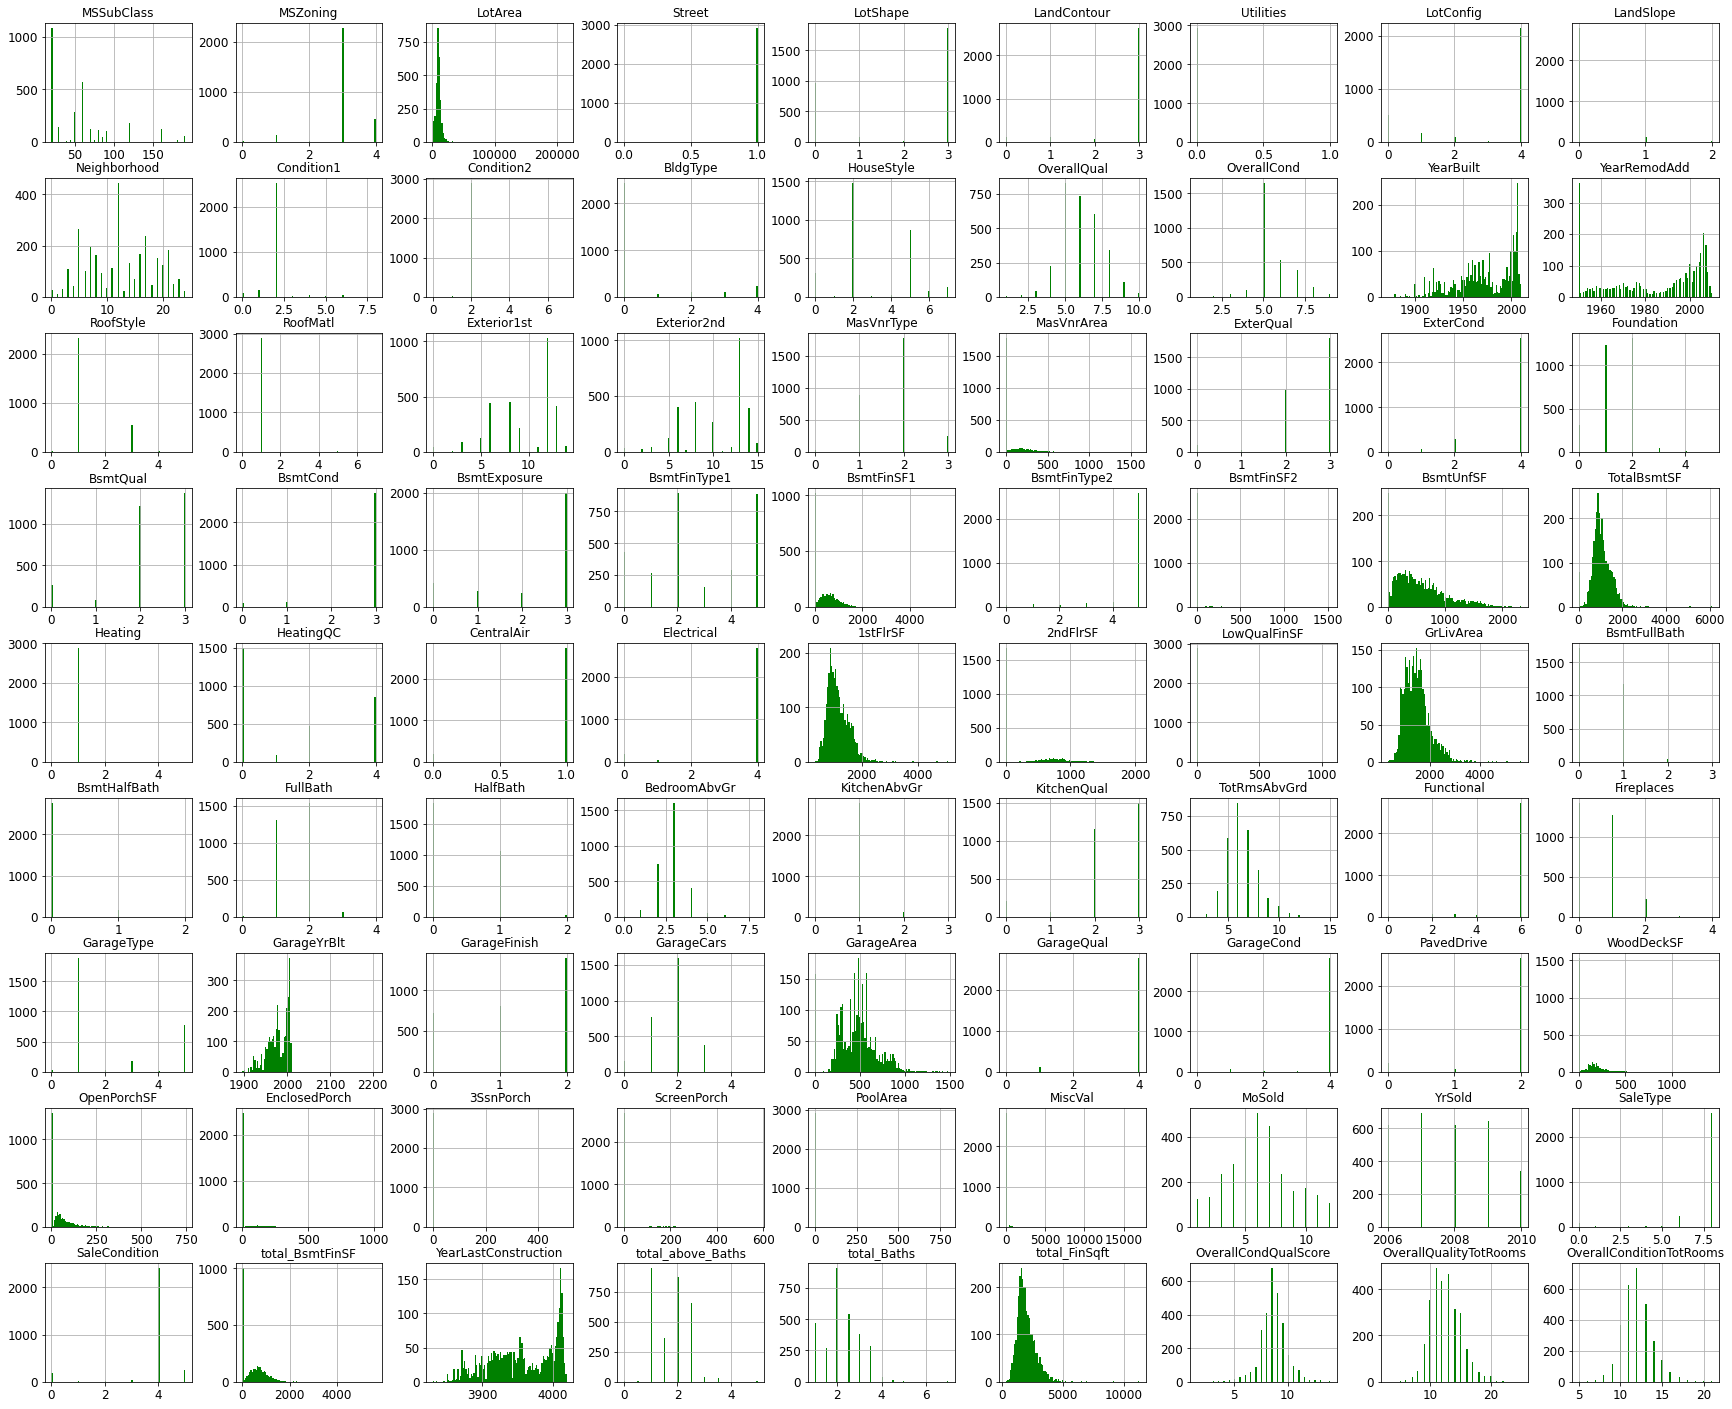

In [152]:
all_data_encoded.hist(bins=100, figsize=(30,25),color='green')

In [153]:
skewness=all_data_encoded.skew(axis=0)
print(skewness.describe())
print(skewness.head())

count    81.000000
mean      1.843891
std       7.738151
min     -15.508104
25%      -0.681181
50%       0.326492
75%       1.843347
max      54.027771
dtype: float64
MSSubClass     1.376165
MSZoning      -1.752645
LotArea       12.829025
Street       -15.508104
LotShape      -0.618007
dtype: float64


In [154]:
all_col=all_data_encoded.columns
for col in all_col:
    skewness_col=all_data_encoded[col].skew(axis=0)
    if ((skewness_col > skewness.describe()[6]) or (skewness_col < skewness.describe()[4])):
        all_data_encoded[col]=np.log1p(all_data_encoded[col])

In [155]:
skewness=all_data_encoded.skew(axis=0)
print(skewness.describe())
print(skewness.head())
print(skewness.describe()[4])
print(skewness.describe()[6])
all_data_encoded[all_col[0]].skew(axis=0)

count    81.000000
mean      0.766945
std       7.102834
min     -15.508104
25%      -1.353095
50%       0.195985
75%       1.179287
max      54.027771
dtype: float64
MSSubClass     1.376165
MSZoning      -3.389816
LotArea       -0.505010
Street       -15.508104
LotShape      -0.618007
dtype: float64
-1.353095054667312
1.1792866254189454


1.3761646373261713

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>,
        <AxesSubplot:title={'center':'Utilities'}>,
        <AxesSubplot:title={'center':'LotConfig'}>,
        <AxesSubplot:title={'center':'LandSlope'}>],
       [<AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'RoofStyle'}>,
  

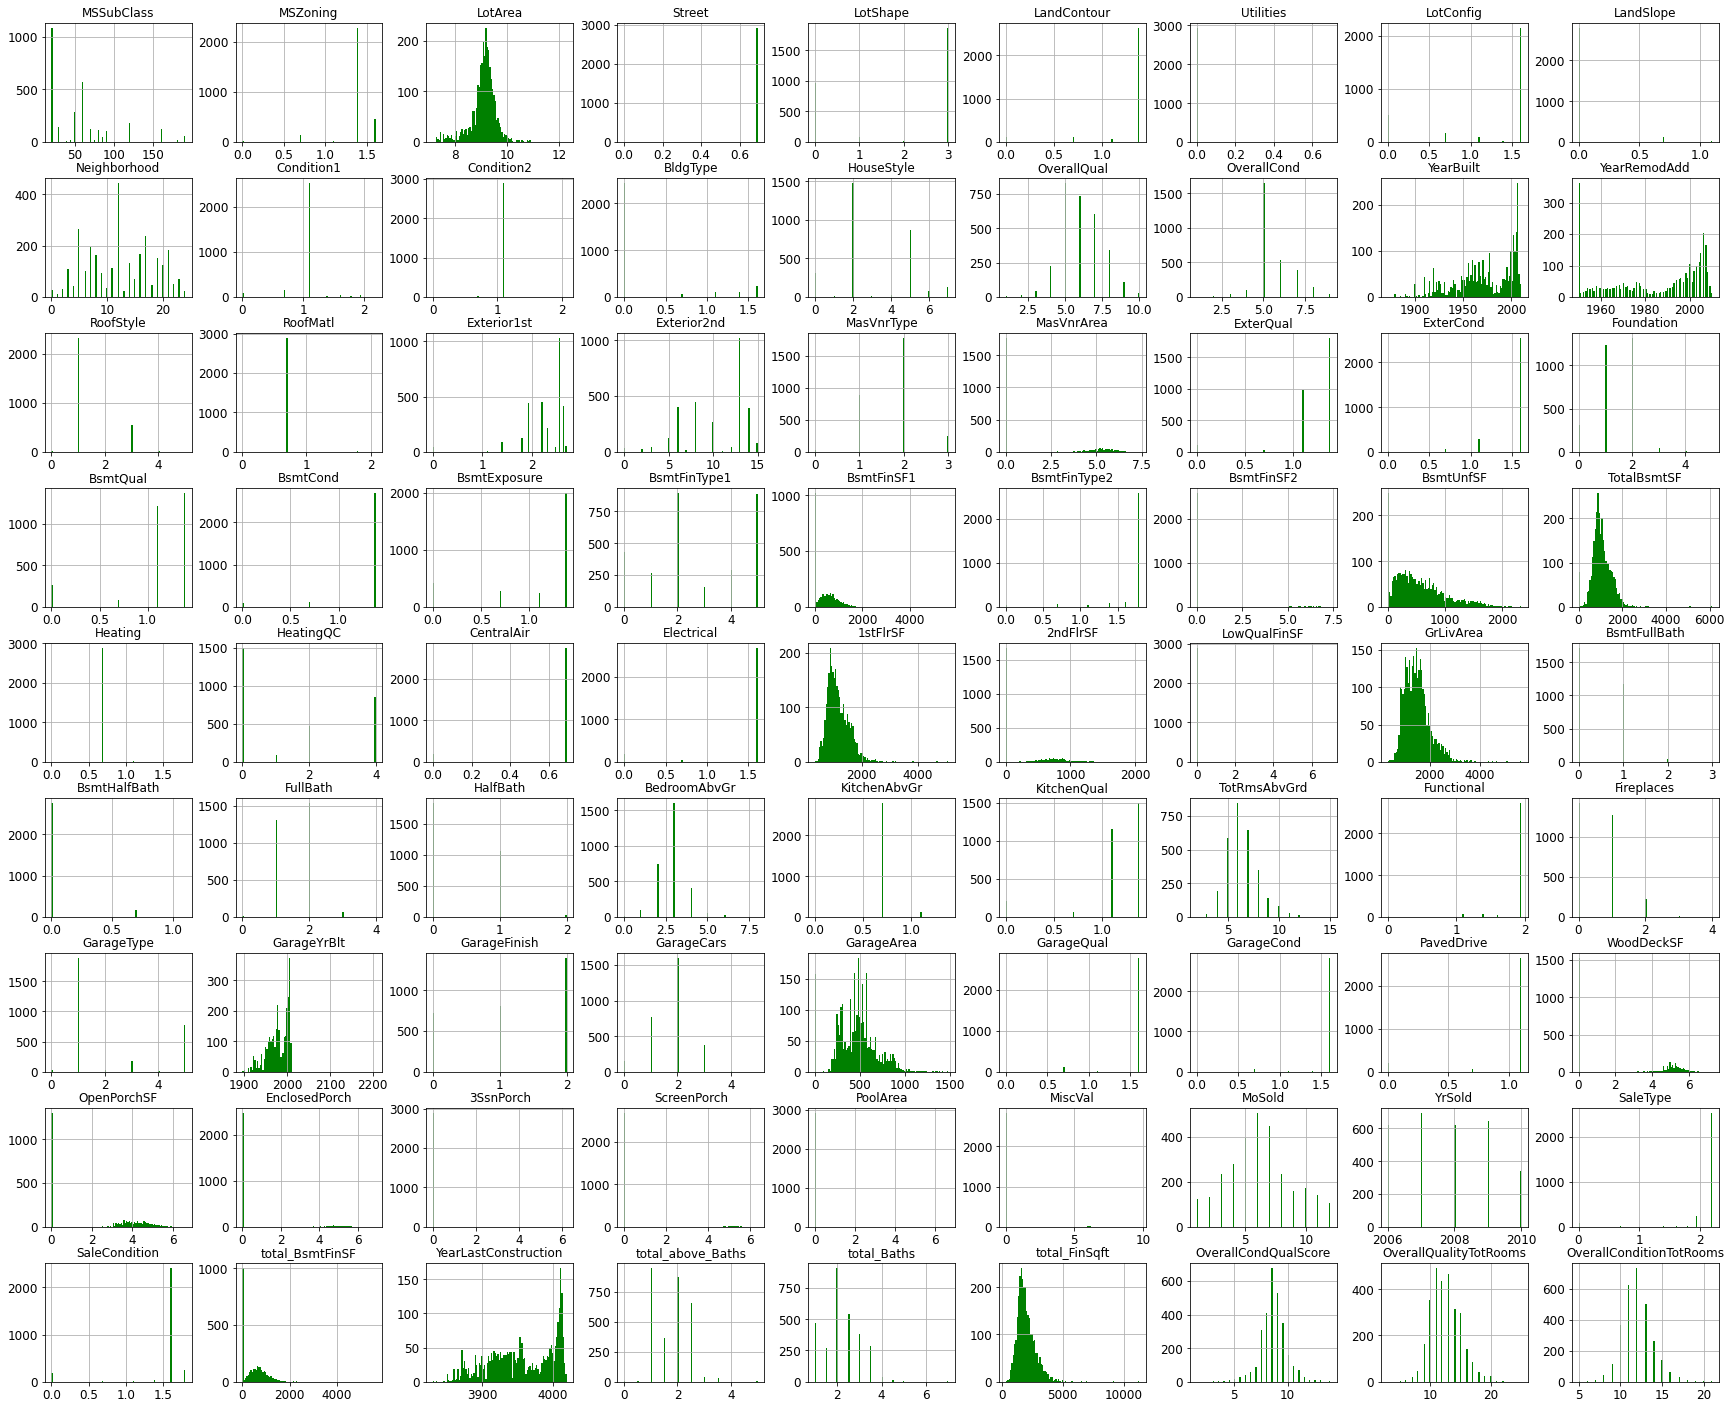

In [156]:
all_data_encoded.hist(bins=100, figsize=(30,25),color='green')

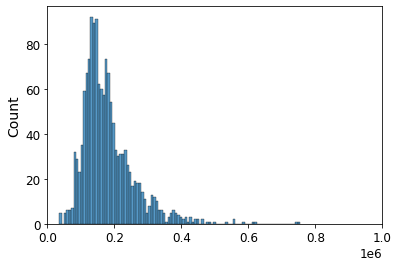

In [157]:
#Checking the skewness of Dependent variable and normalising with log
sns.histplot(x=y_train,bins = 100)
plt.xlim([0,1000000]);

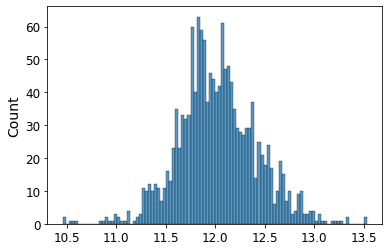

In [158]:
y_train_log = np.log1p(y_train)
sns.histplot(x=y_train_log,bins = 100);

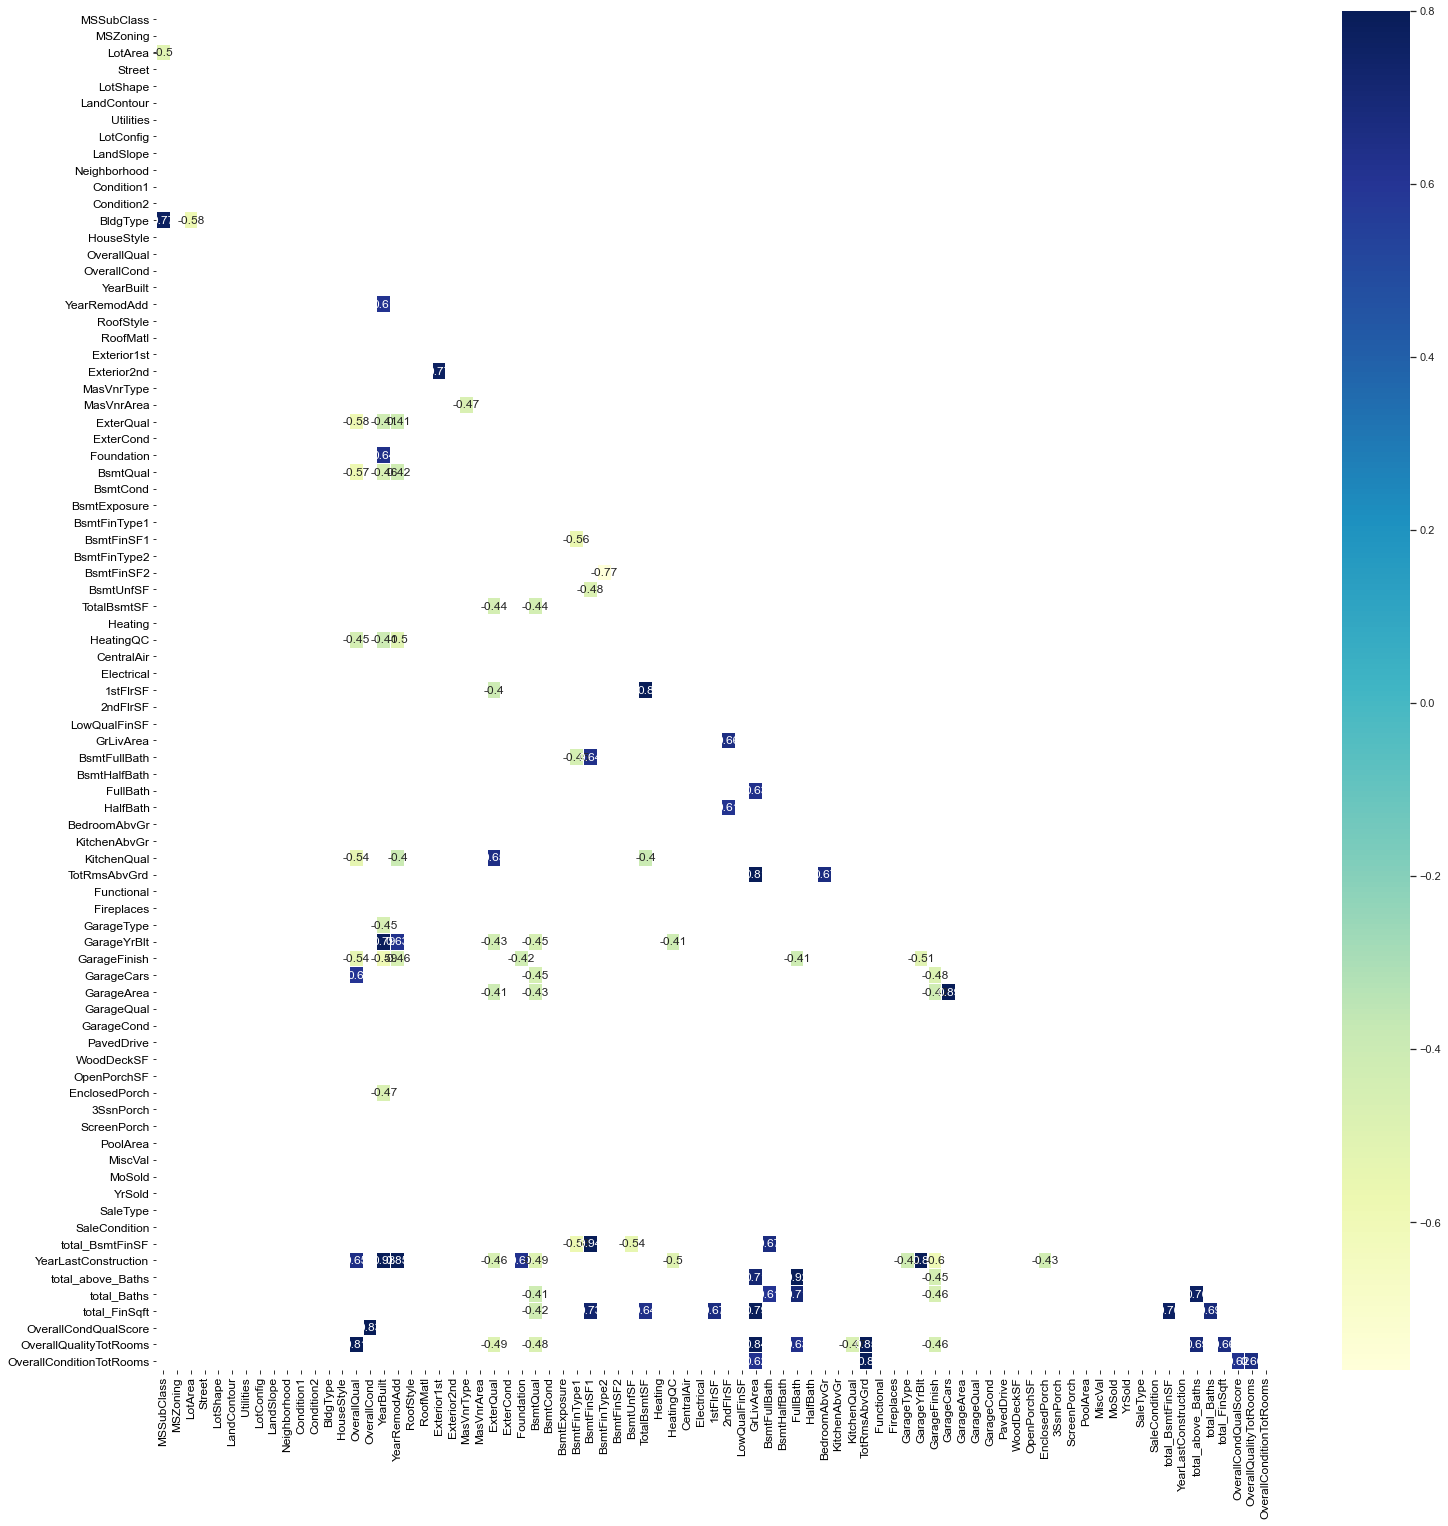

In [159]:
# Checking the Correlation variables
corrmat = all_data_encoded.corr()
fig, ax = plt.subplots(figsize=(25,25))  
matrix = np.triu(all_data_encoded.corr())
color = sns.color_palette("YlGnBu", as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corrmat[(corrmat >= 0.6) | (corrmat <= -0.4)], annot=True,vmax=.8, mask=matrix, ax=ax,cmap = color,linewidths=0.1);

In [160]:
all_data_encoded.head()

MSSubClass  MSZoning   LotArea    Street  LotShape  LandContour  Utilities  \
0          60  1.386294  9.042040  0.693147         3     1.386294        0.0   
1          20  1.386294  9.169623  0.693147         3     1.386294        0.0   
2          60  1.386294  9.328212  0.693147         0     1.386294        0.0   
3          70  1.386294  9.164401  0.693147         0     1.386294        0.0   
4          60  1.386294  9.565284  0.693147         0     1.386294        0.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0   1.609438        0.0             5    1.098612    1.098612       0.0   
1   1.098612        0.0            24    0.693147    1.098612       0.0   
2   1.609438        0.0             5    1.098612    1.098612       0.0   
3   0.000000        0.0             6    1.098612    1.098612       0.0   
4   1.098612        0.0            15    1.098612    1.098612       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           5            7            5       2003          2003          1   
1           2            6            8       1976          1976          1   
2           5            7            5       2001          2002          1   
3           5            7            5       1915          1970          1   
4           5            8            5       2000          2000          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0  0.693147     2.564949           13           1    5.283204   1.098612   
1  0.693147     2.197225            8           2    0.000000   1.386294   
2  0.693147     2.564949           13           1    5.093750   1.098612   
3  0.693147     2.639057           15           2    0.000000   1.386294   
4  0.693147     2.564949           13           1    5.860786   1.098612   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0   1.609438           2  1.098612  1.386294      1.386294             2   
1   1.609438           1  1.098612  1.386294      0.693147             0   
2   1.609438           2  1.098612  1.386294      1.098612             2   
3   1.609438           0  1.386294  0.693147      1.386294             0   
4   1.609438           2  1.098612  1.386294      0.000000             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  \
0       706.0      1.791759         0.0      150.0        856.0  0.693147   
1       978.0      1.791759         0.0      284.0       1262.0  0.693147   
2       486.0      1.791759         0.0      434.0        920.0  0.693147   
3       216.0      1.791759         0.0      540.0        756.0  0.693147   
4       655.0      1.791759         0.0      490.0       1145.0  0.693147   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0    0.693147    1.609438       856       854           0.0   
1          0    0.693147    1.609438      1262         0           0.0   
2          0    0.693147    1.609438       920       866           0.0   
3          2    0.693147    1.609438       961       756           0.0   
4          0    0.693147    1.609438      1145      1053           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0      0.000000         2         1             3   
1       1262           0.0      0.693147         2         0             3   
2       1786           1.0      0.000000         2         1             3   
3       1717           1.0      0.000000         1         0             3   
4       2198           1.0      0.000000         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0      0.693147     1.098612             8     1.94591           0   
1      0.693147     1.386294             6     1.94591           1   
2      0.693147     1.098612             6     1.94591           1   
3      0.693147    

In [161]:
all_data_encoded_minmax=all_data_encoded.copy()
all_col=all_data_encoded.columns
all_col
# define min max scaler
scaler = MinMaxScaler()
all_data_encoded_minmax[all_col] = scaler.fit_transform(all_data_encoded[all_col])
all_data_encoded_minmax[all_col].head()

MSSubClass  MSZoning   LotArea  Street  LotShape  LandContour  Utilities  \
0    0.235294  0.861353  0.366271     1.0       1.0          1.0        0.0   
1    0.000000  0.861353  0.391245     1.0       1.0          1.0        0.0   
2    0.235294  0.861353  0.422289     1.0       0.0          1.0        0.0   
3    0.294118  0.861353  0.390223     1.0       0.0          1.0        0.0   
4    0.235294  0.861353  0.468694     1.0       0.0          1.0        0.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0   1.000000        0.0      0.208333    0.500000    0.528321       0.0   
1   0.682606        0.0      1.000000    0.315465    0.528321       0.0   
2   1.000000        0.0      0.208333    0.500000    0.528321       0.0   
3   0.000000        0.0      0.250000    0.500000    0.528321       0.0   
4   0.682606        0.0      0.625000    0.500000    0.528321       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0    0.714286     0.666667        0.500   0.949275      0.883333        0.2   
1    0.285714     0.555556        0.875   0.753623      0.433333        0.2   
2    0.714286     0.666667        0.500   0.934783      0.866667        0.2   
3    0.714286     0.666667        0.500   0.311594      0.333333        0.2   
4    0.714286     0.777778        0.500   0.927536      0.833333        0.2   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0  0.333333     0.947157     0.866667    0.333333    0.716038   0.792481   
1  0.333333     0.811368     0.533333    0.666667    0.000000   1.000000   
2  0.333333     0.947157     0.866667    0.333333    0.690361   0.792481   
3  0.333333     0.974523     1.000000    0.666667    0.000000   1.000000   
4  0.333333     0.947157     0.866667    0.333333    0.794318   0.792481   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        1.0         0.4  0.792481       1.0      1.000000           0.4   
1        1.0         0.2  0.792481       1.0      0.500000           0.0   
2        1.0         0.4  0.792481       1.0      0.792481           0.4   
3        1.0         0.0  1.000000       0.5      1.000000           0.0   
4        1.0         0.4  0.792481       1.0      0.000000           0.4   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  \
0    0.125089           1.0         0.0   0.064212     0.140098  0.386853   
1    0.173281           1.0         0.0   0.121575     0.206547  0.386853   
2    0.086109           1.0         0.0   0.185788     0.150573  0.386853   
3    0.038271           1.0         0.0   0.231164     0.123732  0.386853   
4    0.116052           1.0         0.0   0.209760     0.187398  0.386853   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        0.0         1.0         1.0  0.109641  0.413559           0.0   
1        0.0         1.0         1.0  0.194917  0.000000           0.0   
2        0.0         1.0         1.0  0.123083  0.419370           0.0   
3        0.5         1.0         1.0  0.131695  0.366102           0.0   
4        0.0         1.0         1.0  0.170342  0.509927           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.259231      0.333333       0.00000      0.50       0.5         0.375   
1   0.174830      0.000000       0.63093      0.50       0.0         0.375   
2   0.273549      0.333333       0.00000      0.50       0.5         0.375   
3   0.260550      0.333333       0.00000      0.25       0.0         0.375   
4   0.351168      0.333333       0.00000      0.50       0.5         0.500   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0           0.5     0.792481      0.461538         1.0        0.00   
1           0.5     1.000000      0.307692         1.0        0.25   
2           0.5     0.792481      0.307692         1.0        0.25   
3           0.5     0.792481   

In [162]:
skewness=all_data_encoded_minmax.skew(axis=0)
print(skewness.describe())
print(skewness.head())

count    81.000000
mean      0.766945
std       7.102834
min     -15.508104
25%      -1.353095
50%       0.195985
75%       1.179287
max      54.027771
dtype: float64
MSSubClass     1.376165
MSZoning      -3.389816
LotArea       -0.505010
Street       -15.508104
LotShape      -0.618007
dtype: float64


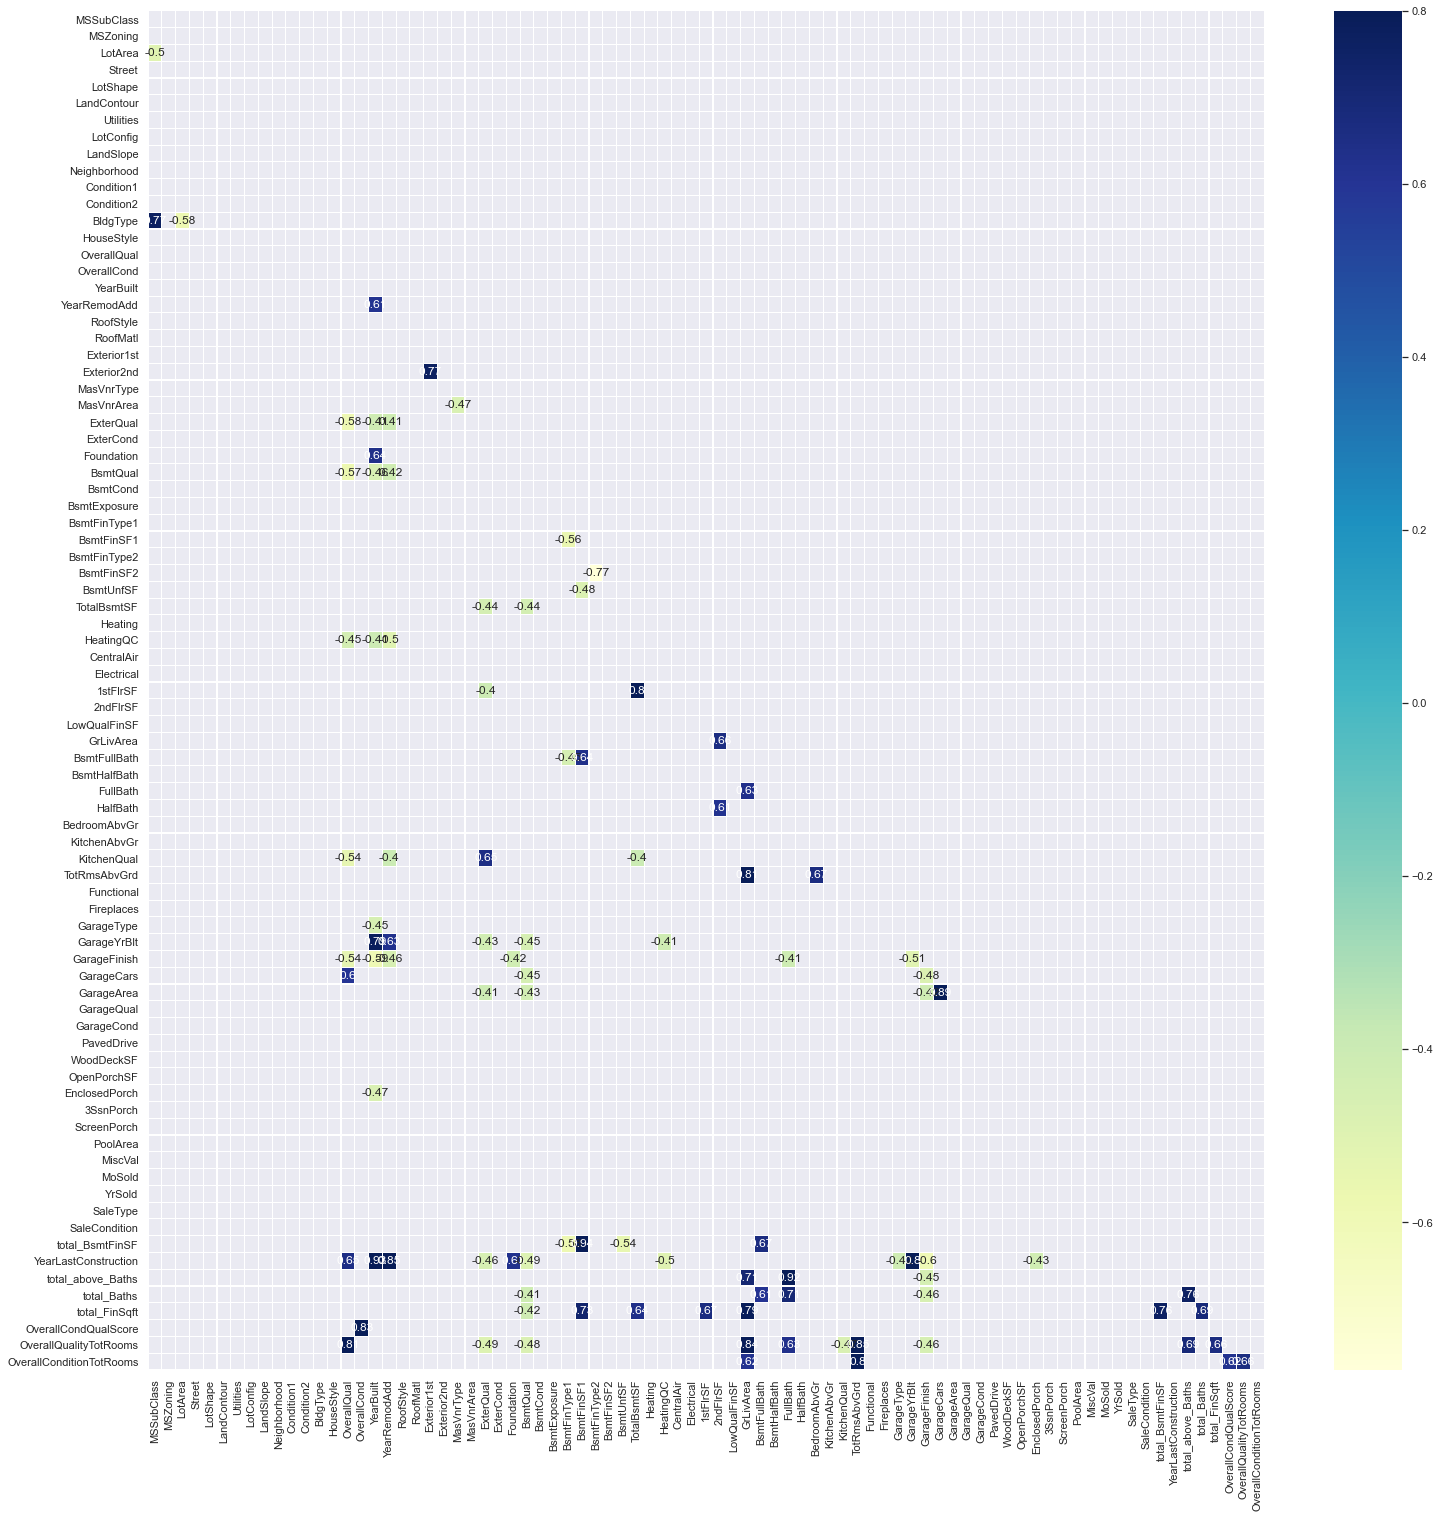

In [163]:
# Checking the Correlation variables
corrmat = all_data_encoded_minmax.corr()
fig, ax = plt.subplots(figsize=(25,25))  
matrix = np.triu(all_data_encoded_minmax.corr())
color = sns.color_palette("YlGnBu", as_cmap=True)
sns.set(font_scale=1)
sns.heatmap(corrmat[(corrmat >= 0.6) | (corrmat <= -0.4)], annot=True,vmax=.8, mask=matrix, ax=ax,cmap = color,linewidths=0.1);

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>,
        <AxesSubplot:title={'center':'Utilities'}>,
        <AxesSubplot:title={'center':'LotConfig'}>,
        <AxesSubplot:title={'center':'LandSlope'}>],
       [<AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'RoofStyle'}>,
  

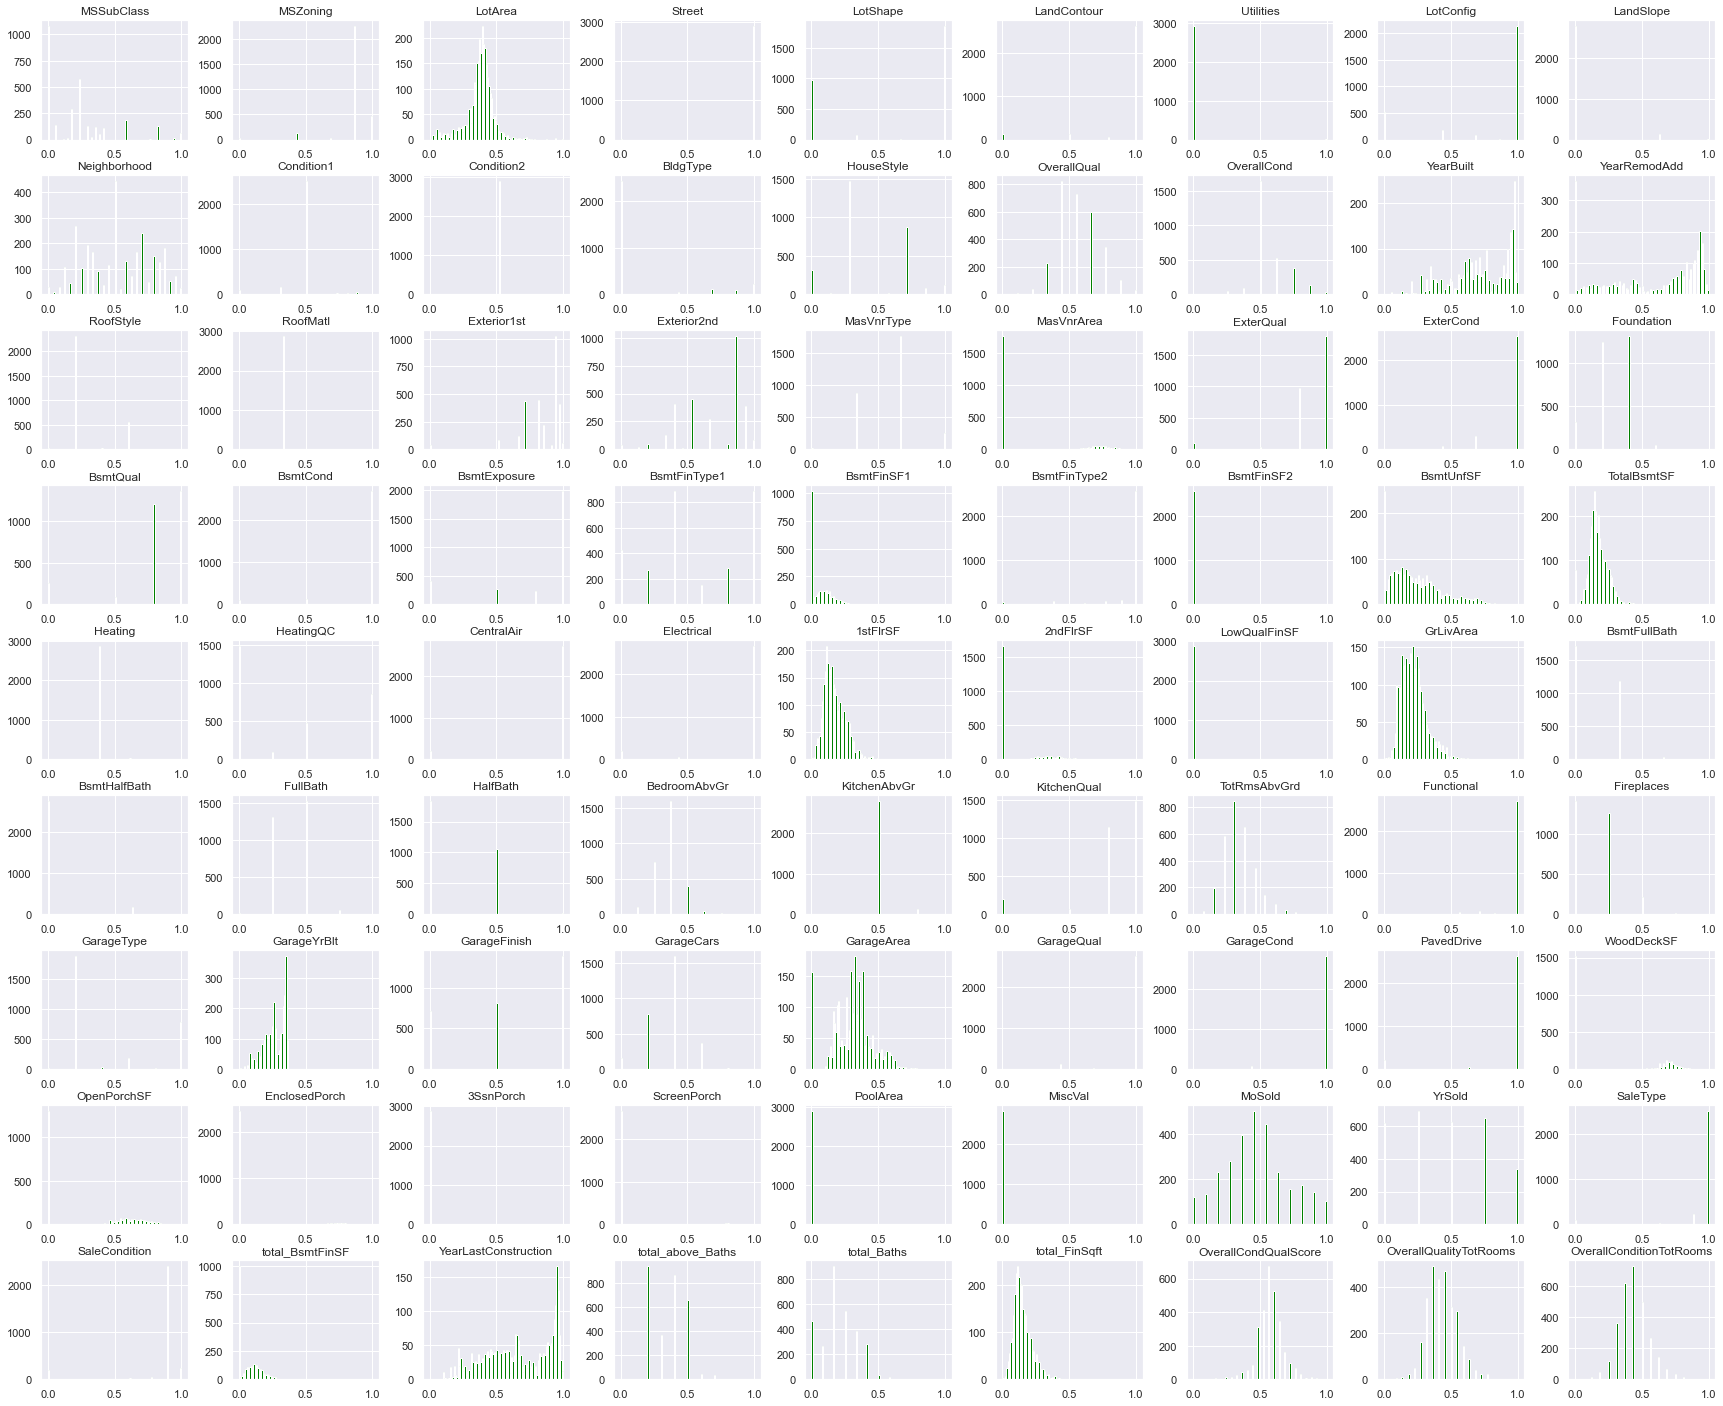

In [164]:
all_data_encoded_minmax.hist(bins=100, figsize=(30,25),color='green')

<AxesSubplot:>

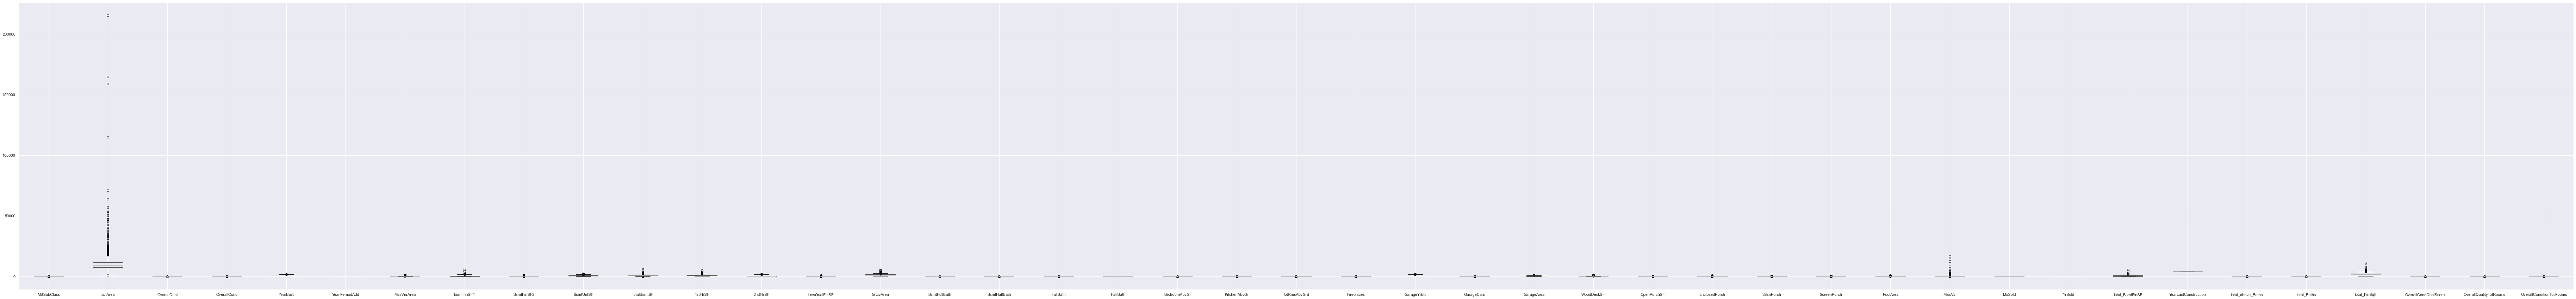

In [165]:
plt.figure(figsize = (130,15))
all_data.boxplot()

<AxesSubplot:>

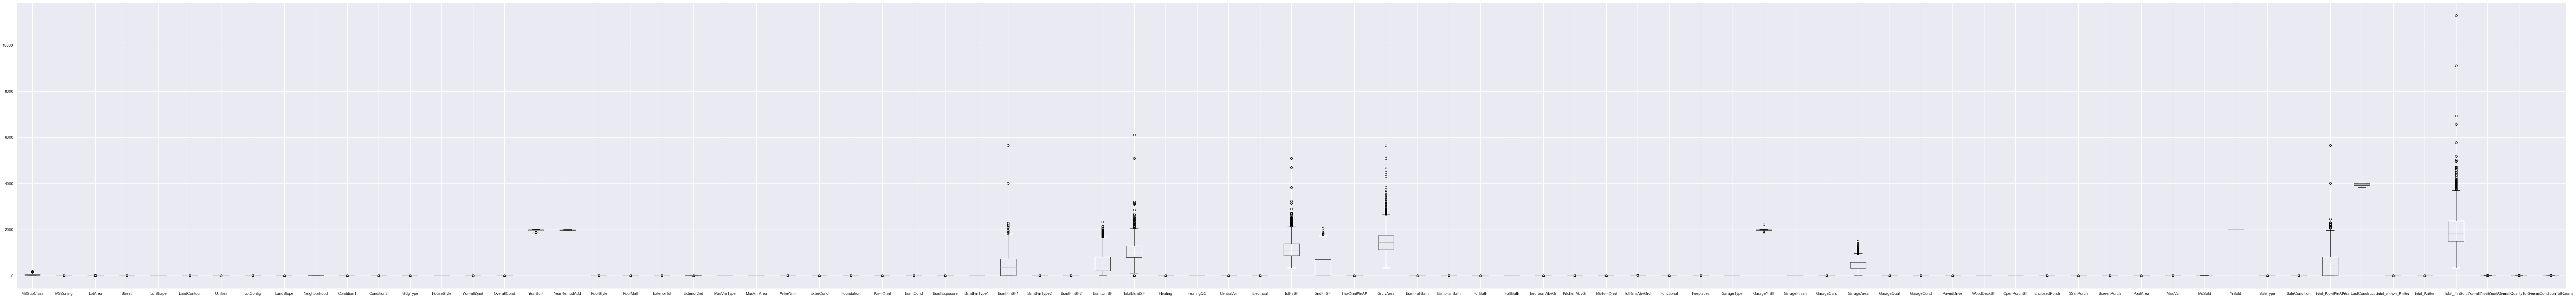

In [166]:
plt.figure(figsize = (130,15))
all_data_encoded.boxplot()

<AxesSubplot:>

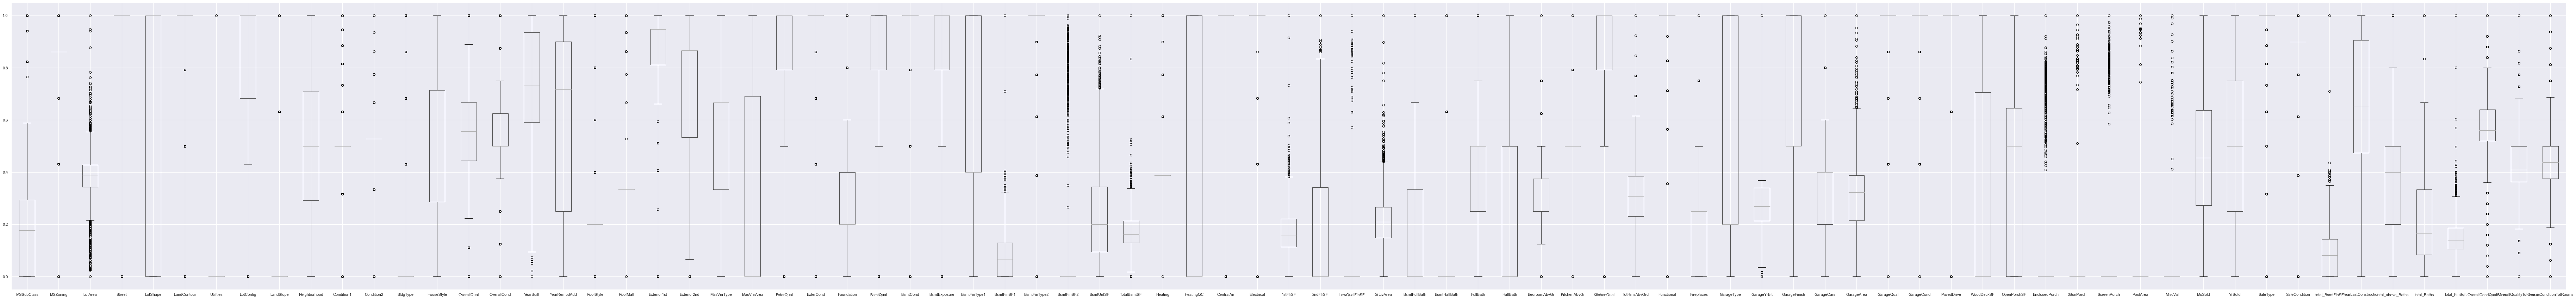

In [167]:
plt.figure(figsize = (130,15))
all_data_encoded_minmax.boxplot()

In [168]:
all_data_encoded_minmax.shape

(2919, 81)

In [169]:
train_df_reg=all_data_encoded_minmax[0:ntrain]
train_df_reg.shape

(1460, 81)

In [170]:
test_df_reg=all_data_encoded_minmax[ntrain:]
test_df_reg.shape

(1459, 81)

<ipython-input-171-40be3e6f60b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_reg["SalesPrice"] = y_train_log


R^2 Scores:  [-7.56915096e+16  8.79196869e-01  8.81169390e-01  8.95774766e-01
 -1.09564856e+18  8.92059460e-01  9.32797754e-01  9.37201651e-01
  8.90496891e-01  9.30597489e-01]

RMSE Scores:  [-1.02501644e+08 -1.41279744e-01 -1.25869860e-01 -1.40606842e-01
 -4.00613639e+08 -1.23821942e-01 -1.07589711e-01 -9.92537238e-02
 -1.31578551e-01 -1.08968084e-01]
Coefficients= [ 3.18067476e-02 -6.84469110e-02  5.25562853e-01  2.47959917e-01
  9.52114840e-04 -1.87119417e-02 -1.03728970e-02 -9.25814050e-04
  6.34935930e-03 -3.65173473e-03  4.62533069e-02 -1.42104707e-01
 -3.14861188e-03 -1.10703902e-02 -3.90988126e+10 -1.67179984e+11
  7.13010227e+11  3.10004447e+11 -8.63329311e-04 -4.94629394e-02
 -6.01619461e-02  2.68564209e-02  5.19592727e-02  1.64139658e-02
 -5.75474400e-02  5.08978320e-02  6.29734989e-02 -4.99090412e-02
  4.08936003e-02 -8.19262658e-03 -2.09016047e-02 -3.90217131e-01
 -4.82287622e-03 -7.23308294e-02 -2.70131745e+10  7.06551783e+10
  4.04232471e-02 -2.53696708e-02  6.32044461e

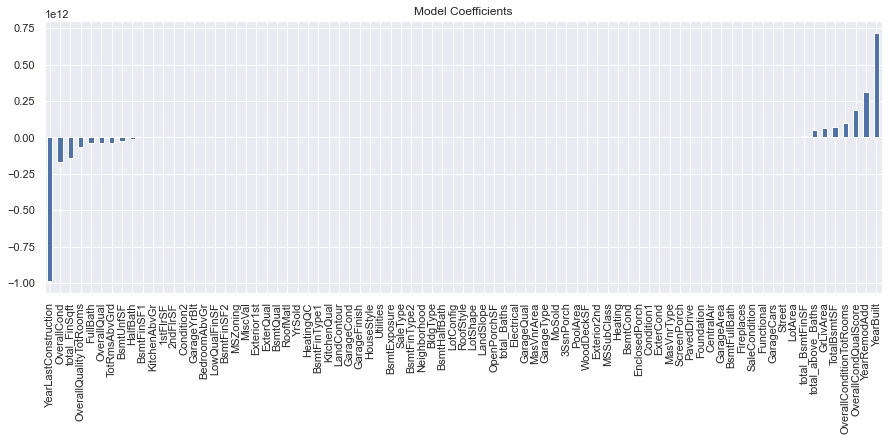

In [171]:
#Basic linear regression
train_df_reg["SalesPrice"] = y_train_log
# train-test 80-20 split
df_train_reg, df_test_reg = train_test_split(train_df_reg, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = df_train_reg.pop('SalesPrice')
X_train_1 = df_train_reg

y_test_1 = df_test_reg.pop('SalesPrice')
X_test_1 = df_test_reg
#Regression
model = LinearRegression()
model.fit(X_train_1, y_train_1)
predicted_prices_regr = model.predict(X_test_1)

#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_regr, squared=False)
rmse

# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 10 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  
# Let us explore the coefficients for each of the independent attributes
print("Coefficients=",model.coef_)
#checking the magnitude of coefficients
predictors = X_train_1.columns
coef = pd.Series(model.coef_.flatten(), predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', figsize=(15,5));
# R square on training data
print("R square on training data:",model.score(X_train_1, y_train_1))
print("R square on training data:",model.score(X_test_1, y_test_1))
RMSE_lr_train = metrics.mean_squared_error(y_true = y_train_1, y_pred=model.predict(X_train_1),squared=False)
RMSE_lr_test = metrics.mean_squared_error(y_true = y_test_1, y_pred=model.predict(X_test_1), squared=False)
resultsDf = pd.DataFrame({'Train RMSE': [RMSE_lr_train],'Test RMSE': [RMSE_lr_test]},index=['LinearRegression'])
print(resultsDf)

In [172]:
# Predicting on actual test data
X_test_1=test_df_reg
predicted_prices_regr = model.predict(X_test_1)
len(predicted_prices_regr)
pred_sale_price=np.expm1(predicted_prices_regr)
result = pd.DataFrame({'Id': df_test_without_miss.Id, 'SalePrice': pred_sale_price})
result.to_csv('result_linear.csv', index=False)
result.head()

Id      SalePrice
0  1461  120633.835901
1  1462  146256.438700
2  1463  179995.511481
3  1464  190638.995819
4  1465  183104.345570

In [173]:
# Modeling with ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.linear_model import RidgeCV

<ipython-input-174-a7dd6b672b56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_reg["SalesPrice"] = y_train_log


R^2 Scores:  [0.89497203 0.91441107]

RMSE Scores:  [-0.12750053 -0.11761174]
Coefficients= [ 2.70974053e-02 -6.54933882e-02  4.93400674e-01  2.30264895e-01
 -2.41245450e-04 -1.94128504e-02 -1.71760579e-02 -2.30641131e-03
  1.00174232e-02 -1.68659794e-03  4.91776523e-02 -1.17405621e-01
 -7.02609428e-03 -1.58066623e-02  3.66320076e-01  1.72452781e-01
  1.84088599e-01  5.88402823e-03  4.96744101e-03 -3.00981271e-02
 -5.96148956e-02  2.66921091e-02  4.76941988e-02  1.54374657e-02
 -5.64731685e-02  4.91640013e-02  6.68777779e-02 -5.09828635e-02
  3.98175114e-02 -1.01738442e-02 -1.95200406e-02  4.72713557e-03
 -1.04802990e-02 -3.37737546e-02  1.08086641e-01  3.25064069e-01
  3.50762232e-02 -2.59192355e-02  6.47798315e-02  1.06961737e-02
  5.50170549e-01  2.09925178e-01 -3.34397016e-02  5.96901798e-01
  7.03482985e-02 -6.87757496e-03  3.79055105e-02  1.70769329e-02
 -1.02254521e-01 -2.69528338e-01 -2.41736786e-02 -5.09769942e-02
  1.33793758e-01  1.09355959e-01  1.39980991e-02 -1.12490816e-0

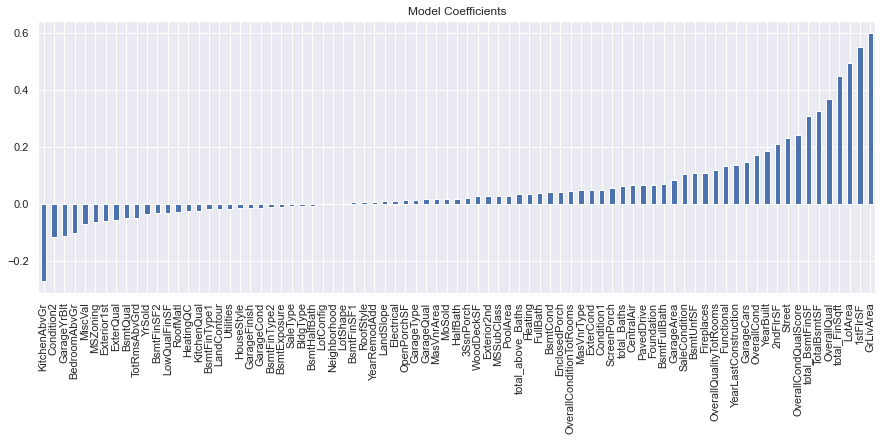

In [174]:
#Ridge regression
train_df_reg["SalesPrice"] = y_train_log
# train-test 80-20 split
df_train_reg, df_test_reg = train_test_split(train_df_reg, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = df_train_reg.pop('SalesPrice')
X_train_1 = df_train_reg

y_test_1 = df_test_reg.pop('SalesPrice')
X_test_1 = df_test_reg
#Regression
model = RidgeCV(alphas=(list(np.arange(0.25,0.3,0.01))),scoring='neg_mean_squared_error',cv=LeaveOneOut())
model.fit(X_train_1, y_train_1)
predicted_prices_regr = model.predict(X_test_1)

#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_regr, squared=False)
rmse

# create a KFold object with 2 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 2 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  
# Let us explore the coefficients for each of the independent attributes
print("Coefficients=",model.coef_)
#checking the magnitude of coefficients
predictors = X_train_1.columns
coef = pd.Series(model.coef_.flatten(), predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', figsize=(15,5));
# R square on training data
print("R square on train data:",model.score(X_train_1, y_train_1))
print("R square on test data:",model.score(X_test_1, y_test_1))
RMSE_lr_train = metrics.mean_squared_error(y_true = y_train_1, y_pred=model.predict(X_train_1),squared=False)
RMSE_lr_test = metrics.mean_squared_error(y_true = y_test_1, y_pred=model.predict(X_test_1), squared=False)
resultsDf = pd.DataFrame({'Train RMSE': [RMSE_lr_train],'Test RMSE': [RMSE_lr_test]},index=['RidgeRegression'])
print(resultsDf)
print("alpha=",model.alpha_)

In [175]:
# Predicting on actual test data
X_test_1=test_df_reg
predicted_prices_regr = model.predict(X_test_1)
len(predicted_prices_regr)
pred_sale_price=np.expm1(predicted_prices_regr)
result = pd.DataFrame({'Id': df_test_without_miss.Id, 'SalePrice': pred_sale_price})
result.to_csv('result_ridge.csv', index=False)
result.head()

Id      SalePrice
0  1461  122601.732526
1  1462  145302.434005
2  1463  179680.757995
3  1464  191132.243349
4  1465  182860.453408

In [176]:
#Optimizing for alpha
from sklearn.linear_model import Lasso,LassoCV

<ipython-input-177-b8f4265af53b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_reg["SalesPrice"] = y_train_log


alpha= {'alpha': 1e-08}
R^2 Scores:  [0.89317119 0.91472138]

RMSE Scores:  [-0.12858896 -0.11739834]
Coefficients= [ 3.27450744e-02 -6.93117348e-02  5.23084028e-01  2.46956583e-01
  8.44869224e-04 -1.95398810e-02 -1.08470754e-02 -9.98633201e-04
  5.97122827e-03 -3.76299893e-03  4.66330066e-02 -1.45693750e-01
 -4.20555718e-03 -1.20621130e-02  1.24900738e+00  3.27355933e-01
  6.68324613e-01  2.05338075e-01 -6.08342257e-04 -4.95908923e-02
 -6.03477453e-02  2.74203325e-02  5.22094734e-02  1.68269489e-02
 -5.79042415e-02  5.02761961e-02  6.21374529e-02 -4.96298117e-02
  4.05843899e-02 -8.18652975e-03 -2.06040139e-02 -3.88568713e-01
 -5.24307739e-03 -7.20624903e-02 -2.52766865e-01  1.25054687e+00
  3.64307406e-02 -2.51621123e-02  6.30134831e-02  1.11437964e-02
  4.63242353e-01  1.51016814e-01 -4.85508456e-02  8.86060247e-01
  5.81554105e-02 -1.01798740e-02 -3.31962111e-01 -7.48954057e-02
 -1.12608181e-01 -3.02503632e-01 -2.02442099e-02 -1.50483708e-01
  1.41966868e-01  9.77420052e-02  1.708

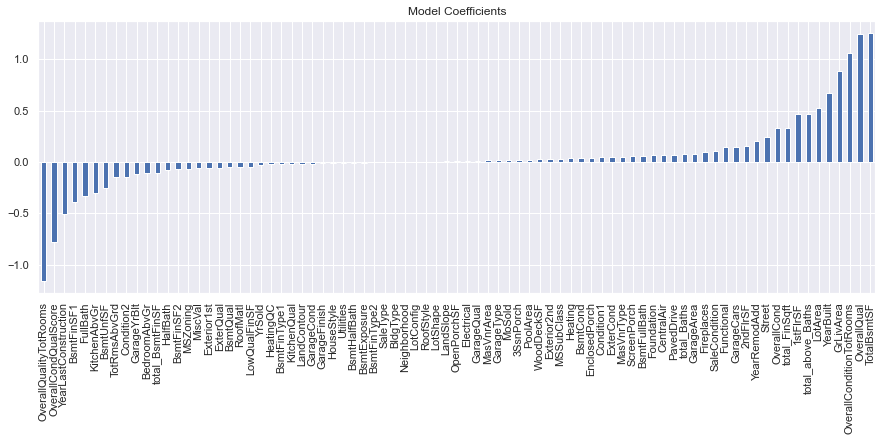

In [177]:
#Lasso regression
train_df_reg["SalesPrice"] = y_train_log
# train-test 80-20 split
df_train_reg, df_test_reg = train_test_split(train_df_reg, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = df_train_reg.pop('SalesPrice')
X_train_1 = df_train_reg

y_test_1 = df_test_reg.pop('SalesPrice')
X_test_1 = df_test_reg
#Finding best alpha for lasso 
lasso=Lasso()
parameters={'alpha':[1e-10,1e-9,1e-8,1e10,1e9,1e8]}

lasso_model = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=LeaveOneOut(),n_jobs=-1)
lasso_model.fit(X_train_1, y_train_1)
best_lasso_alpha=lasso_model.best_params_
print("alpha=",best_lasso_alpha)
#Lasso Regression
model=Lasso(alpha=best_lasso_alpha['alpha'])
model.fit(X_train_1, y_train_1)
predicted_prices_regr = model.predict(X_test_1)
#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_regr, squared=False)
rmse

# create a KFold object with 2 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 2 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  
# Let us explore the coefficients for each of the independent attributes
print("Coefficients=",model.coef_)
#checking the magnitude of coefficients
predictors = X_train_1.columns
coef = pd.Series(model.coef_.flatten(), predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', figsize=(15,5));
# R square on training data
print("R square on train data:",model.score(X_train_1, y_train_1))
print("R square on test data:",model.score(X_test_1, y_test_1))
RMSE_lr_train = metrics.mean_squared_error(y_true = y_train_1, y_pred=model.predict(X_train_1),squared=False)
RMSE_lr_test = metrics.mean_squared_error(y_true = y_test_1, y_pred=model.predict(X_test_1), squared=False)
resultsDf = pd.DataFrame({'Train RMSE': [RMSE_lr_train],'Test RMSE': [RMSE_lr_test]},index=['LassoRegression'])
print(resultsDf)

In [178]:
# Predicting on actual test data
X_test_1=test_df_reg
predicted_prices_regr = model.predict(X_test_1)
len(predicted_prices_regr)
pred_sale_price=np.expm1(predicted_prices_regr)
result = pd.DataFrame({'Id': df_test_without_miss.Id, 'SalePrice': pred_sale_price})
result.to_csv('result_lasso.csv', index=False)
result.head()

Id      SalePrice
0  1461  120785.225918
1  1462  147149.568673
2  1463  180317.795894
3  1464  190698.215907
4  1465  183122.556965

In [179]:
from sklearn.linear_model import ElasticNet

<ipython-input-180-2e1118154c0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_reg["SalesPrice"] = y_train_log


alpha & l1_ratio= {'alpha': 1e-08, 'l1_ratio': 0.001}
R^2 Scores:  [0.8931709  0.91472111]

RMSE Scores:  [-0.12858914 -0.11739853]
Coefficients= [ 3.27470134e-02 -6.93122855e-02  5.23084381e-01  2.46958955e-01
  8.44991913e-04 -1.95398685e-02 -1.08576794e-02 -9.98701377e-04
  5.97169037e-03 -3.76288312e-03  4.66331906e-02 -1.45699128e-01
 -4.20667962e-03 -1.20626936e-02  1.24918734e+00  3.27918597e-01
  6.68181418e-01  2.05275092e-01 -6.08801224e-04 -4.95947050e-02
 -6.03489859e-02  2.74208315e-02  5.22100232e-02  1.68273434e-02
 -5.79047652e-02  5.02774551e-02  6.21381108e-02 -4.96300404e-02
  4.05850513e-02 -8.18635732e-03 -2.06044240e-02 -3.88606404e-01
 -5.24390000e-03 -7.20665328e-02 -2.52869226e-01  1.25080718e+00
  3.64383071e-02 -2.51621493e-02  6.30142811e-02  1.11441072e-02
  4.62861305e-01  1.50848712e-01 -4.85855871e-02  8.85761251e-01
  5.80064847e-02 -1.02200282e-02 -3.32528433e-01 -7.50369953e-02
 -1.12608998e-01 -3.02505073e-01 -2.02443729e-02 -1.50230614e-01
  1.41968

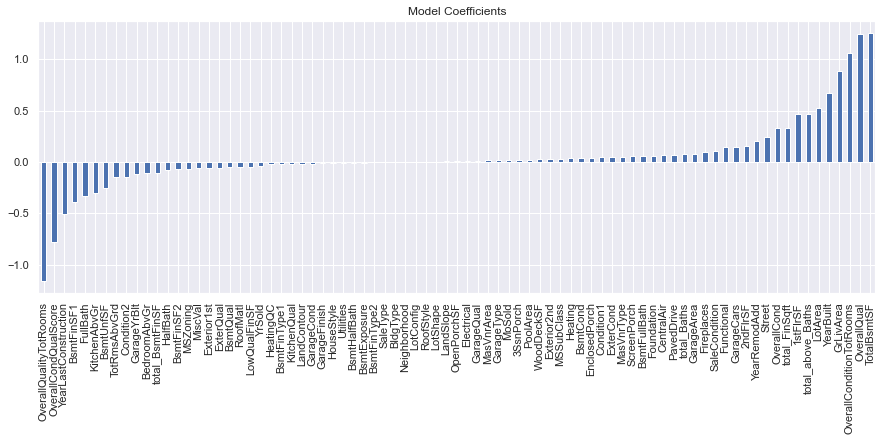

In [180]:
#Elasticnet regression
train_df_reg["SalesPrice"] = y_train_log
# train-test 80-20 split
df_train_reg, df_test_reg = train_test_split(train_df_reg, 
                                     train_size = 0.8, 
                                     test_size = 0.2, 
                                     random_state = 13)

# Divide into X_train, y_train, X_test, y_test
y_train_1 = df_train_reg.pop('SalesPrice')
X_train_1 = df_train_reg

y_test_1 = df_test_reg.pop('SalesPrice')
X_test_1 = df_test_reg
#Finding best alpha for lasso 
Elasticnet=ElasticNet()
parameters={'alpha':[1e-10,1e-9,1e-8,1e10,1e9,1e8],
            'l1_ratio':[0.001,0.100,0.189,0.278,0.367,0.456,0.544,0.633,0.722,0.811,0.900,0.999]}

elastic_model=GridSearchCV(Elasticnet,parameters,scoring='neg_mean_squared_error',cv=LeaveOneOut(),n_jobs=-1)
elastic_model.fit(X_train_1,y_train_1)

best_elast_param=elastic_model.best_params_
print("alpha & l1_ratio=",best_elast_param)
#Elasticnet Regression
model=ElasticNet(alpha=best_elast_param['alpha'],l1_ratio=best_elast_param['l1_ratio'])
model.fit(X_train_1, y_train_1)
predicted_prices_regr = model.predict(X_test_1)
#RMSE
rmse = mean_squared_error(y_test_1, predicted_prices_regr, squared=False)
rmse

# create a KFold object with 2 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='r2', cv=folds)
print("R^2 Scores: ",scores)

# create a KFold object with 2 splits 
folds = KFold(n_splits = 2, shuffle = True, random_state = 13)
scores = cross_val_score(model, X_train_1, y_train_1, scoring='neg_root_mean_squared_error', cv=folds)
print("")
print("RMSE Scores: ",scores)  
# Let us explore the coefficients for each of the independent attributes
print("Coefficients=",model.coef_)
#checking the magnitude of coefficients
predictors = X_train_1.columns
coef = pd.Series(model.coef_.flatten(), predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', figsize=(15,5));
# R square on training data
print("R square on train data:",model.score(X_train_1, y_train_1))
print("R square on test data:",model.score(X_test_1, y_test_1))
RMSE_lr_train = metrics.mean_squared_error(y_true = y_train_1, y_pred=model.predict(X_train_1),squared=False)
RMSE_lr_test = metrics.mean_squared_error(y_true = y_test_1, y_pred=model.predict(X_test_1), squared=False)
resultsDf = pd.DataFrame({'Train RMSE': [RMSE_lr_train],'Test RMSE': [RMSE_lr_test]},index=['ElasticnetRegression'])
print(resultsDf)

In [181]:
# Predicting on actual test data
X_test_1=test_df_reg
predicted_prices_regr = model.predict(X_test_1)
len(predicted_prices_regr)
pred_sale_price=np.expm1(predicted_prices_regr)
result = pd.DataFrame({'Id': df_test_without_miss.Id, 'SalePrice': pred_sale_price})
result.to_csv('result_elastic.csv', index=False)
result.head()

Id      SalePrice
0  1461  120785.100331
1  1462  147153.137847
2  1463  180317.867217
3  1464  190698.251732
4  1465  183122.565270